# <center>Hotel Booking Demand Dataset Analysis</center>

<center><img src="https://images.unsplash.com/photo-1566073771259-6a8506099945?ixlib=rb-1.2.1&auto=format&fit=crop&w=1000&q=80" width="800"></center>

## Table of Contents
1. [Data Description](#1-data-description)
2. [Data Loading](#2-data-loading)
3. [Data Understanding](#3-data-understanding)
   - [Basic Statistics](#31-basic-statistics)
   - [Missing Values Analysis](#32-missing-values-analysis)
   - [Data Visualization](#33-data-visualization)
4. [Data Preparation](#4-data-preparation)
   - [Handling Missing Values](#41-handling-missing-values)
   - [Handling Outliers](#42-handling-outliers)
   - [Encoding Categorical Variables](#43-encoding-categorical-variables)
   - [Feature Engineering](#44-feature-engineering)
   - [Feature Selection](#45-feature-selection)
5. [Conclusion](#5-conclusion)

# 1. Data Description

## Nama Dataset dan Sumbernya
Dataset yang digunakan adalah **Hotel Booking Demand** yang tersedia di [Kaggle](https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand).

## Deskripsi Singkat
Dataset ini berisi informasi tentang pemesanan hotel dari dua jenis hotel: Resort Hotel dan City Hotel. Data mencakup pemesanan yang tiba antara 1 Juli 2015 dan 31 Agustus 2017, termasuk pemesanan yang berhasil check-in dan pemesanan yang dibatalkan.

Dataset ini sangat berguna untuk analisis perilaku pemesanan hotel, prediksi pembatalan, dan strategi penetapan harga. Informasi yang terkandung di dalamnya dapat membantu hotel untuk:
- Mengoptimalkan strategi penetapan harga
- Memprediksi pembatalan pemesanan
- Memahami preferensi tamu
- Menganalisis pola musiman dalam pemesanan

## Jumlah Data
- **Jumlah Sampel**: Dataset ini berisi lebih dari 119.000 observasi
- **Jumlah Fitur**: Terdapat 32 kolom/fitur
- **Label**: Kolom 'is_canceled' dapat digunakan sebagai label untuk model prediksi pembatalan

## Format Data
Dataset tersedia dalam format CSV (Comma Separated Values).

## Deskripsi Kolom

* **hotel**: Jenis hotel (Resort Hotel atau City Hotel)
* **is_canceled**: Nilai yang menunjukkan apakah pemesanan dibatalkan (1) atau tidak (0)
* **lead_time**: Jumlah hari antara tanggal pemesanan dan tanggal kedatangan
* **arrival_date_year**: Tahun tanggal kedatangan
* **arrival_date_month**: Bulan tanggal kedatangan
* **arrival_date_week_number**: Nomor minggu dari tanggal kedatangan
* **arrival_date_day_of_month**: Hari dalam bulan dari tanggal kedatangan
* **stays_in_weekend_nights**: Jumlah malam akhir pekan (Sabtu atau Minggu) yang dipesan
* **stays_in_week_nights**: Jumlah malam hari kerja (Senin sampai Jumat) yang dipesan
* **adults**: Jumlah orang dewasa
* **children**: Jumlah anak-anak
* **babies**: Jumlah bayi
* **meal**: Jenis paket makanan yang dipesan
* **country**: Negara asal tamu
* **market_segment**: Segmen pasar pemesanan
* **distribution_channel**: Saluran distribusi pemesanan
* **is_repeated_guest**: Nilai yang menunjukkan apakah tamu adalah tamu berulang (1) atau tidak (0)
* **previous_cancellations**: Jumlah pembatalan sebelumnya oleh tamu
* **previous_bookings_not_canceled**: Jumlah pemesanan sebelumnya yang tidak dibatalkan oleh tamu
* **reserved_room_type**: Kode jenis kamar yang dipesan
* **assigned_room_type**: Kode jenis kamar yang diberikan
* **booking_changes**: Jumlah perubahan/amandemen yang dilakukan pada pemesanan
* **deposit_type**: Jenis deposit yang dibayarkan
* **agent**: ID agen perjalanan yang melakukan pemesanan
* **company**: ID perusahaan/entitas yang melakukan pemesanan
* **days_in_waiting_list**: Jumlah hari pemesanan berada dalam daftar tunggu
* **customer_type**: Jenis pelanggan
* **adr**: Average Daily Rate (Tarif Harian Rata-rata)
* **required_car_parking_spaces**: Jumlah tempat parkir mobil yang diminta
* **total_of_special_requests**: Jumlah permintaan khusus dari pelanggan
* **reservation_status**: Status reservasi (Check-Out, Canceled, No-Show)
* **reservation_status_date**: Tanggal status reservasi terakhir ditetapkan

# 2. Data Loading

Pada bagian ini, kita akan memuat dataset Hotel Booking Demand ke dalam lingkungan pemrograman Python. Kita akan menggunakan library Pandas untuk memuat dan memanipulasi data.

In [ ]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium
from folium.plugins import HeatMap
import warnings

# Mengabaikan warning untuk tampilan yang lebih bersih
warnings.filterwarnings('ignore')

# Mengatur gaya visualisasi
plt.style.use('fivethirtyeight')
%matplotlib inline

# Mengatur opsi tampilan pandas
pd.set_option('display.max_columns', 32)
pd.set_option('display.max_rows', 50)

## Memuat Dataset

Kita akan memuat dataset menggunakan fungsi `read_csv()` dari Pandas. Dataset tersedia dalam format CSV, sehingga mudah dimuat menggunakan Pandas.

In [ ]:
import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv"

response = requests.get(url)
df = pd.read_csv(StringIO(response.text))
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Tantangan dalam Memuat Data dan Solusinya

Beberapa tantangan yang mungkin dihadapi saat memuat dataset ini:

1. **Path File**: Jika menjalankan kode di lingkungan lokal, pastikan path file sudah benar. Solusinya adalah dengan menggunakan path relatif atau absolut yang sesuai dengan lokasi file.

2. **Encoding**: Beberapa file CSV mungkin menggunakan encoding yang berbeda. Jika terjadi error saat memuat file, coba tambahkan parameter `encoding` seperti `encoding='utf-8'` atau `encoding='latin1'`.

3. **Separator**: Meskipun format file adalah CSV (Comma Separated Values), beberapa file mungkin menggunakan separator lain seperti titik koma (;) atau tab. Jika terjadi error, coba tambahkan parameter `sep` seperti `sep=';'` atau `sep='\t'`.

4. **Missing Values**: Dataset mungkin memiliki nilai yang hilang dengan representasi yang berbeda seperti 'NA', 'N/A', atau string kosong. Pandas secara default mengenali beberapa representasi nilai yang hilang, tetapi jika diperlukan, tambahkan parameter `na_values` seperti `na_values=['NA', 'N/A', '', ' ']`.

Dalam kasus dataset Hotel Booking Demand ini, tidak ada tantangan khusus dalam memuat data karena formatnya standar dan konsisten.

# 3. Data Understanding

Pada bagian ini, kita akan melakukan eksplorasi awal terhadap dataset untuk memahami karakteristik dan pola yang ada di dalamnya.

## 3.1 Basic Statistics

Pertama, kita akan melihat informasi umum tentang dataset seperti jumlah baris dan kolom, tipe data, dan statistik dasar.

In [ ]:
# Melihat informasi umum tentang dataset
print("Informasi Dataset:")
print(f"Jumlah Baris: {df.shape[0]}")
print(f"Jumlah Kolom: {df.shape[1]}")
print("\nTipe Data:")
df.info()

Informasi Dataset:
Jumlah Baris: 119390
Jumlah Kolom: 32

Tipe Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies   

In [ ]:
# Melihat statistik dasar untuk kolom numerik
print("Statistik Dasar untuk Kolom Numerik:")
df.describe()

Statistik Dasar untuk Kolom Numerik:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Melihat statistik dasar untuk kolom kategorikal
print("Statistik Dasar untuk Kolom Kategorikal:")
df.describe(include=['object'])

Statistik Dasar untuk Kolom Kategorikal:


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [ ]:
# Melihat nilai unik untuk setiap kolom kategorikal
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nKolom: {col}")
    print(f"Jumlah Nilai Unik: {df[col].nunique()}")
    print(f"Nilai Unik: {df[col].unique()[:10] if df[col].nunique() > 10 else df[col].unique()}")
    if df[col].nunique() > 10:
        print("...")


Kolom: hotel
Jumlah Nilai Unik: 2
Nilai Unik: ['Resort Hotel' 'City Hotel']

Kolom: arrival_date_month
Jumlah Nilai Unik: 12
Nilai Unik: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April']
...

Kolom: meal
Jumlah Nilai Unik: 5
Nilai Unik: ['BB' 'FB' 'HB' 'SC' 'Undefined']

Kolom: country
Jumlah Nilai Unik: 177
Nilai Unik: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN']
...

Kolom: market_segment
Jumlah Nilai Unik: 8
Nilai Unik: ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

Kolom: distribution_channel
Jumlah Nilai Unik: 5
Nilai Unik: ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

Kolom: reserved_room_type
Jumlah Nilai Unik: 10
Nilai Unik: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

Kolom: assigned_room_type
Jumlah Nilai Unik: 12
Nilai Unik: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P']
...

Kolom: deposit_type
Jumlah Nilai Unik: 3
Nilai Unik: ['No Deposit' 'Refundable' 'Non 

## 3.2 Missing Values Analysis

Selanjutnya, kita akan menganalisis nilai yang hilang (missing values) dalam dataset.

In [ ]:
# Menghitung jumlah nilai yang hilang untuk setiap kolom
missing_values = pd.DataFrame({
    'Jumlah Nilai Hilang': df.isna().sum(),
    'Persentase Nilai Hilang': (df.isna().sum() / len(df) * 100).round(2)
})

missing_values = missing_values.sort_values('Jumlah Nilai Hilang', ascending=False)
missing_values

,Jumlah Nilai Hilang,Persentase Nilai Hilang
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00
reserved_room_type,0,0.00
assigned_room_type,0,0.00
booking_changes,0,0.00
deposit_type,0,0.00
hotel,0,0.00
previous_cancellations,0,0.00


<Figure size 1200x800 with 0 Axes>

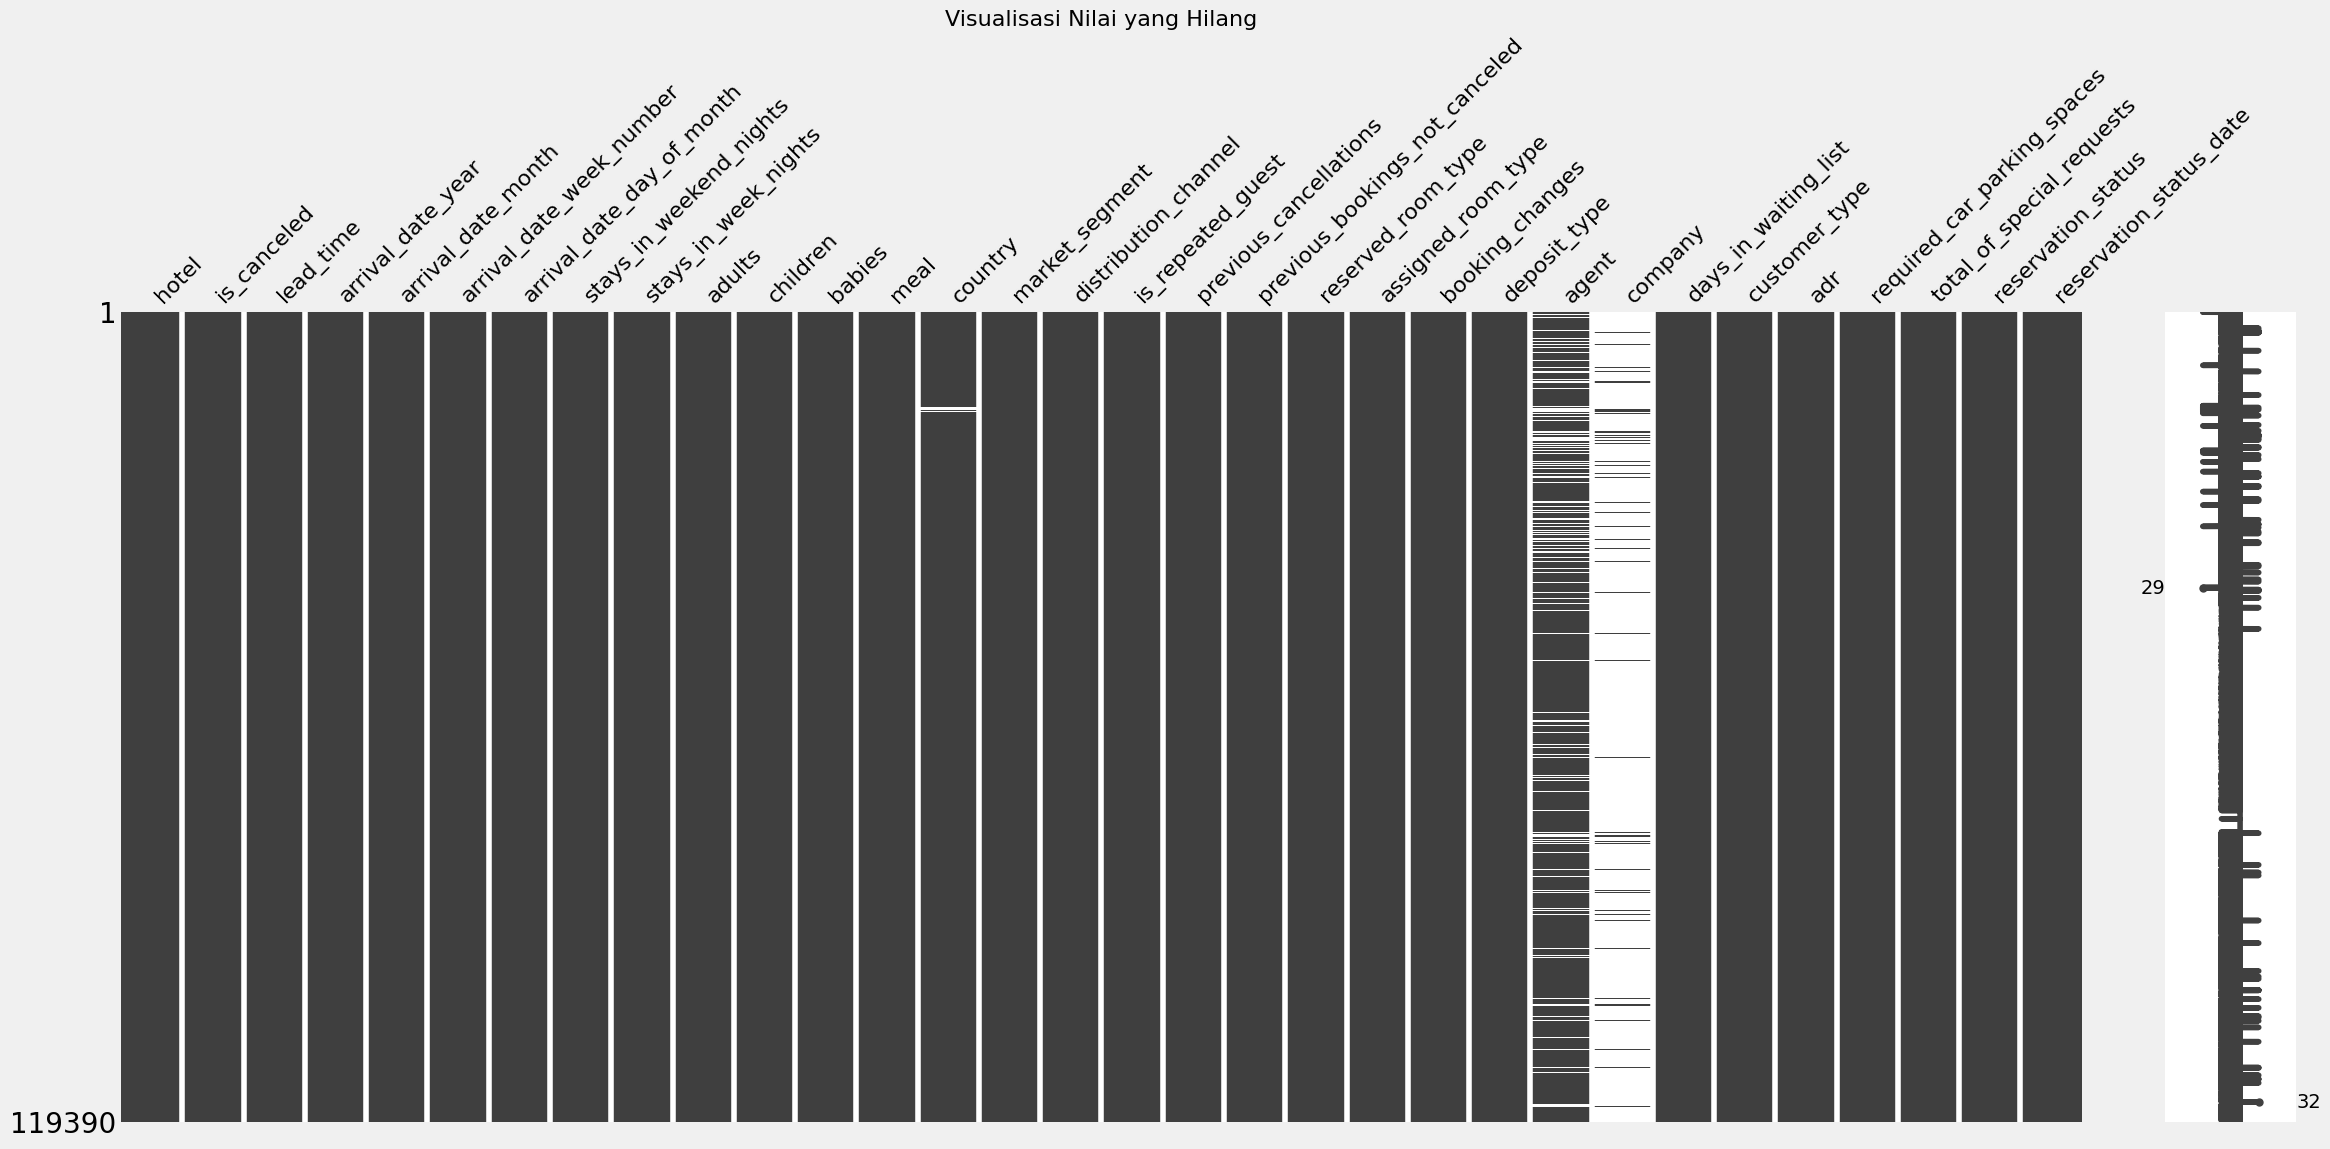

In [ ]:
# Visualisasi nilai yang hilang
plt.figure(figsize=(12, 8))
msno.matrix(df)
plt.title('Visualisasi Nilai yang Hilang', fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

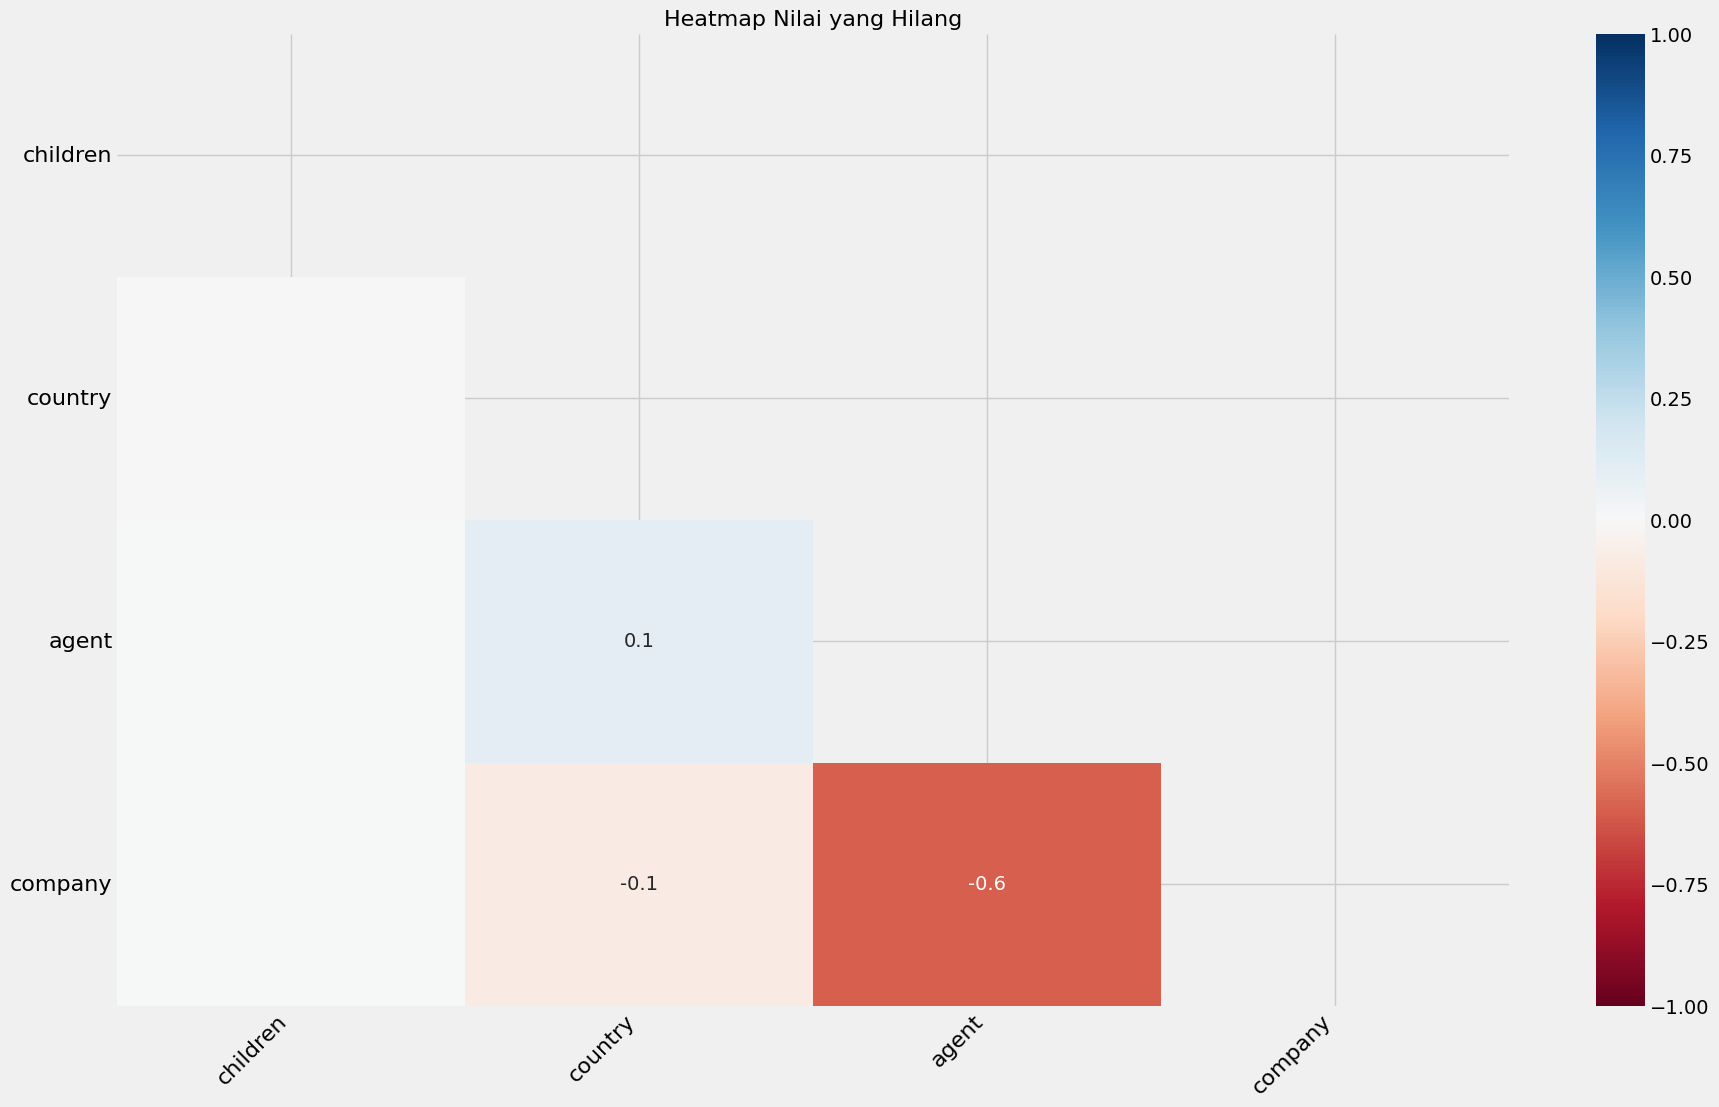

In [ ]:
# Visualisasi nilai yang hilang dengan heatmap
plt.figure(figsize=(12, 8))
msno.heatmap(df)
plt.title('Heatmap Nilai yang Hilang', fontsize=16)
plt.show()

## 3.3 Data Visualization

Pada bagian ini, kita akan melakukan visualisasi data untuk mendapatkan wawasan awal tentang dataset.

### 3.3.1 Distribusi Pemesanan berdasarkan Jenis Hotel

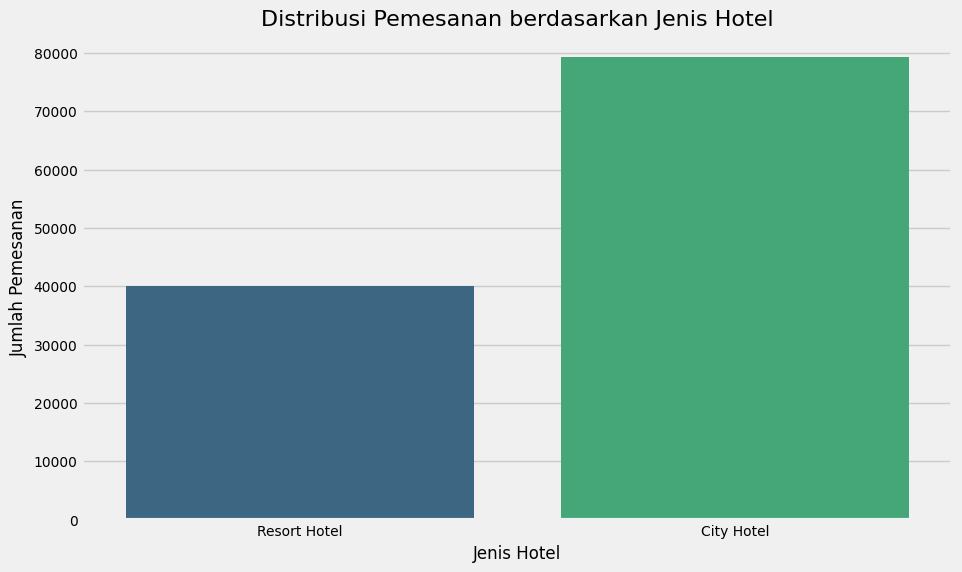

In [ ]:
# Distribusi pemesanan berdasarkan jenis hotel
plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', data=df, palette='viridis')
plt.title('Distribusi Pemesanan berdasarkan Jenis Hotel', fontsize=16)
plt.xlabel('Jenis Hotel', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3.3.2 Distribusi Pemesanan yang Dibatalkan vs Tidak Dibatalkan

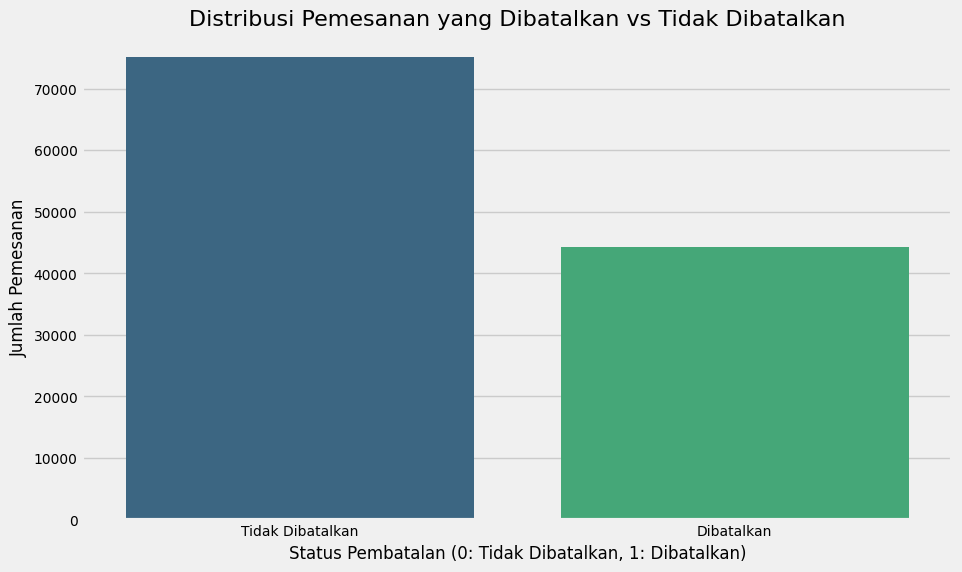

In [ ]:
# Distribusi pemesanan yang dibatalkan vs tidak dibatalkan
plt.figure(figsize=(10, 6))
sns.countplot(x='is_canceled', data=df, palette='viridis')
plt.title('Distribusi Pemesanan yang Dibatalkan vs Tidak Dibatalkan', fontsize=16)
plt.xlabel('Status Pembatalan (0: Tidak Dibatalkan, 1: Dibatalkan)', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks([0, 1], ['Tidak Dibatalkan', 'Dibatalkan'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

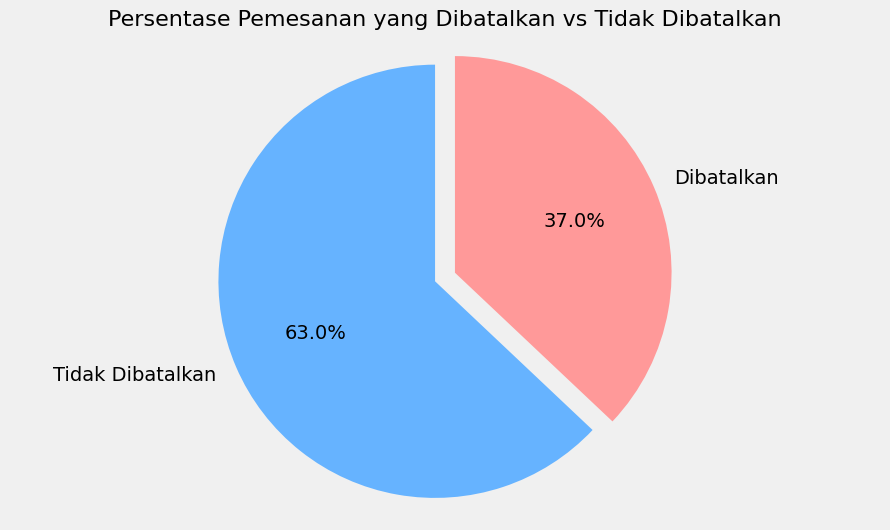

In [ ]:
# Persentase pemesanan yang dibatalkan vs tidak dibatalkan
canceled_percentage = df['is_canceled'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
plt.pie(canceled_percentage, labels=['Tidak Dibatalkan', 'Dibatalkan'], autopct='%1.1f%%',
        colors=['#66b3ff', '#ff9999'], startangle=90, explode=(0.1, 0))
plt.title('Persentase Pemesanan yang Dibatalkan vs Tidak Dibatalkan', fontsize=16)
plt.axis('equal')
plt.show()

### 3.3.3 Distribusi Pemesanan berdasarkan Bulan Kedatangan

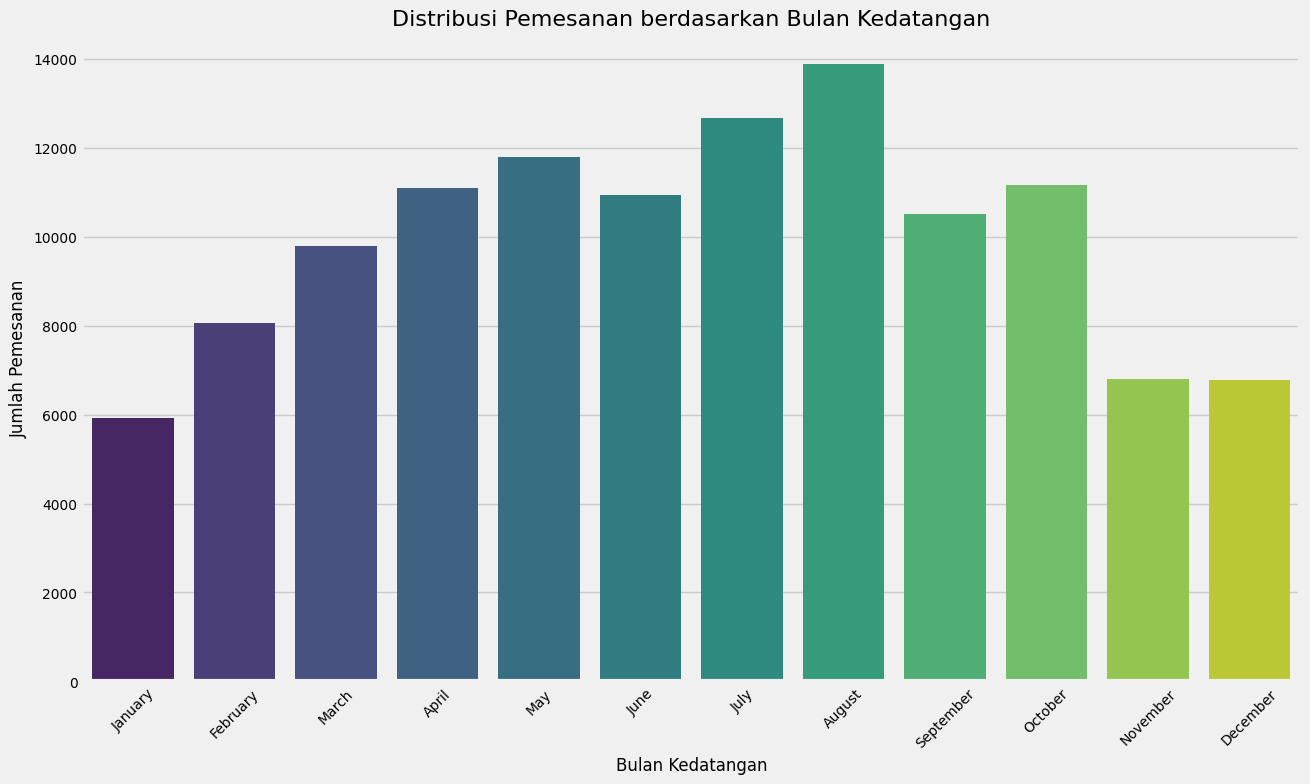

In [ ]:
# Distribusi pemesanan berdasarkan bulan kedatangan
plt.figure(figsize=(14, 8))
sns.countplot(x='arrival_date_month', data=df, palette='viridis',
              order=['January', 'February', 'March', 'April', 'May', 'June',
                     'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Distribusi Pemesanan berdasarkan Bulan Kedatangan', fontsize=16)
plt.xlabel('Bulan Kedatangan', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3.3.4 Distribusi Pemesanan berdasarkan Jenis Hotel dan Status Pembatalan

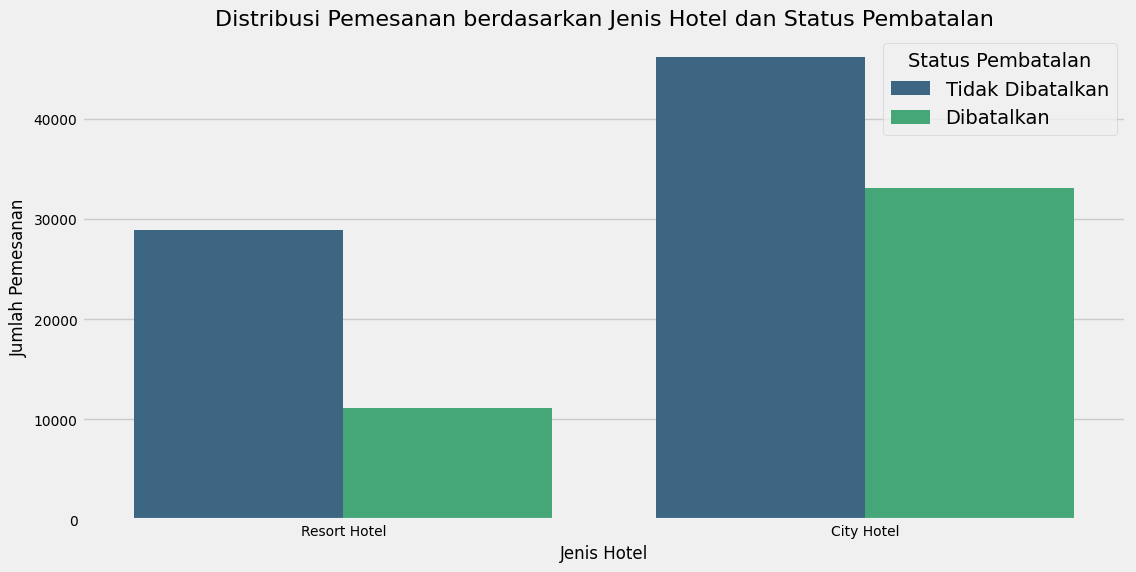

In [ ]:
# Distribusi pemesanan berdasarkan jenis hotel dan status pembatalan
plt.figure(figsize=(12, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='viridis')
plt.title('Distribusi Pemesanan berdasarkan Jenis Hotel dan Status Pembatalan', fontsize=16)
plt.xlabel('Jenis Hotel', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Status Pembatalan', labels=['Tidak Dibatalkan', 'Dibatalkan'])
plt.show()

### 3.3.5 Distribusi Pemesanan berdasarkan Segmen Pasar

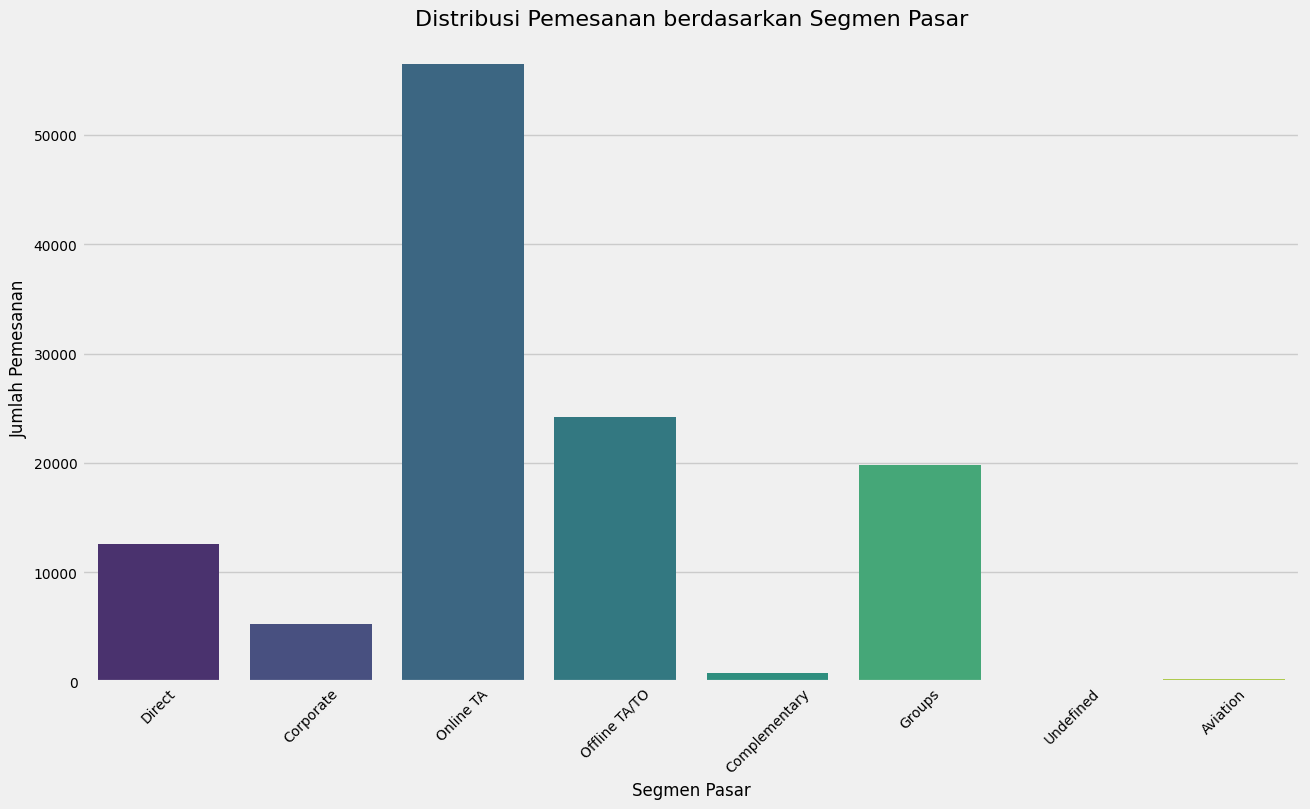

In [ ]:
# Distribusi pemesanan berdasarkan segmen pasar
plt.figure(figsize=(14, 8))
sns.countplot(x='market_segment', data=df, palette='viridis')
plt.title('Distribusi Pemesanan berdasarkan Segmen Pasar', fontsize=16)
plt.xlabel('Segmen Pasar', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3.3.6 Distribusi Pemesanan berdasarkan Negara Asal Tamu

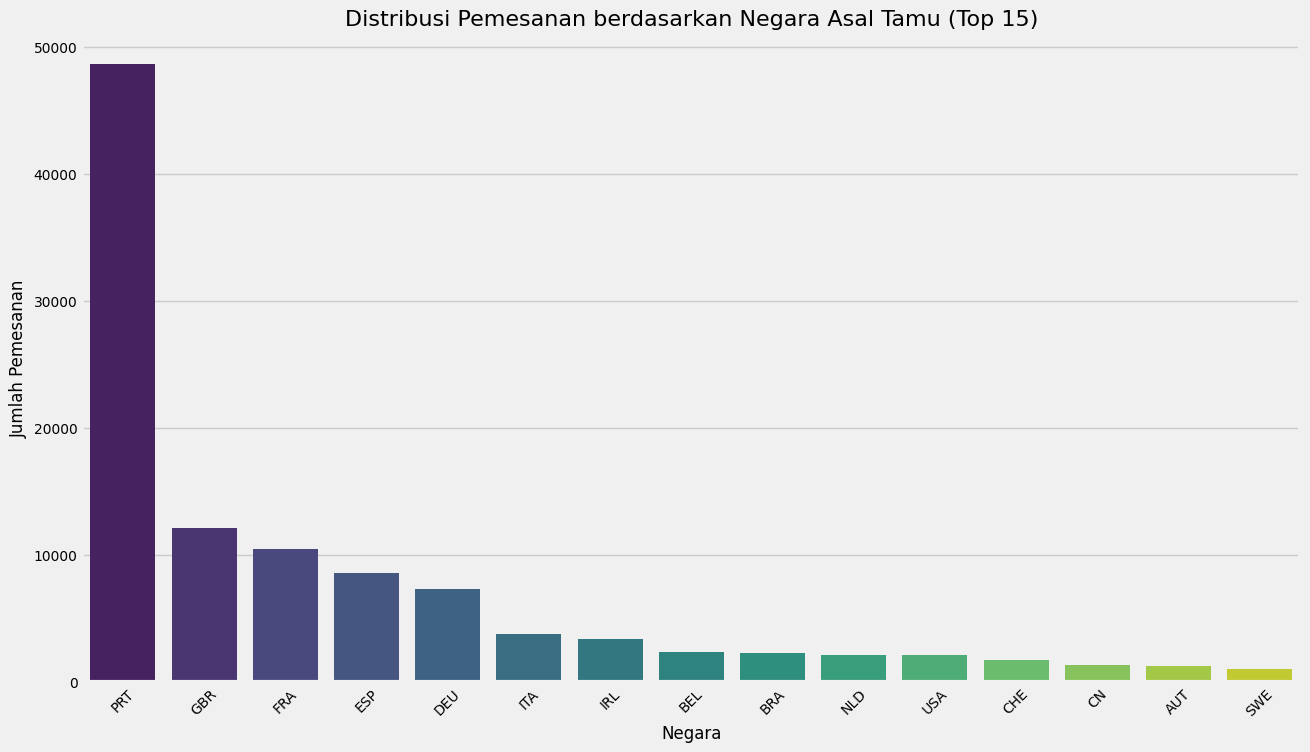

In [ ]:
# Distribusi pemesanan berdasarkan negara asal tamu (top 15)
top_countries = df['country'].value_counts().head(15)
plt.figure(figsize=(14, 8))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Distribusi Pemesanan berdasarkan Negara Asal Tamu (Top 15)', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Jumlah Pemesanan', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3.3.7 Distribusi Tarif Harian Rata-rata (ADR)

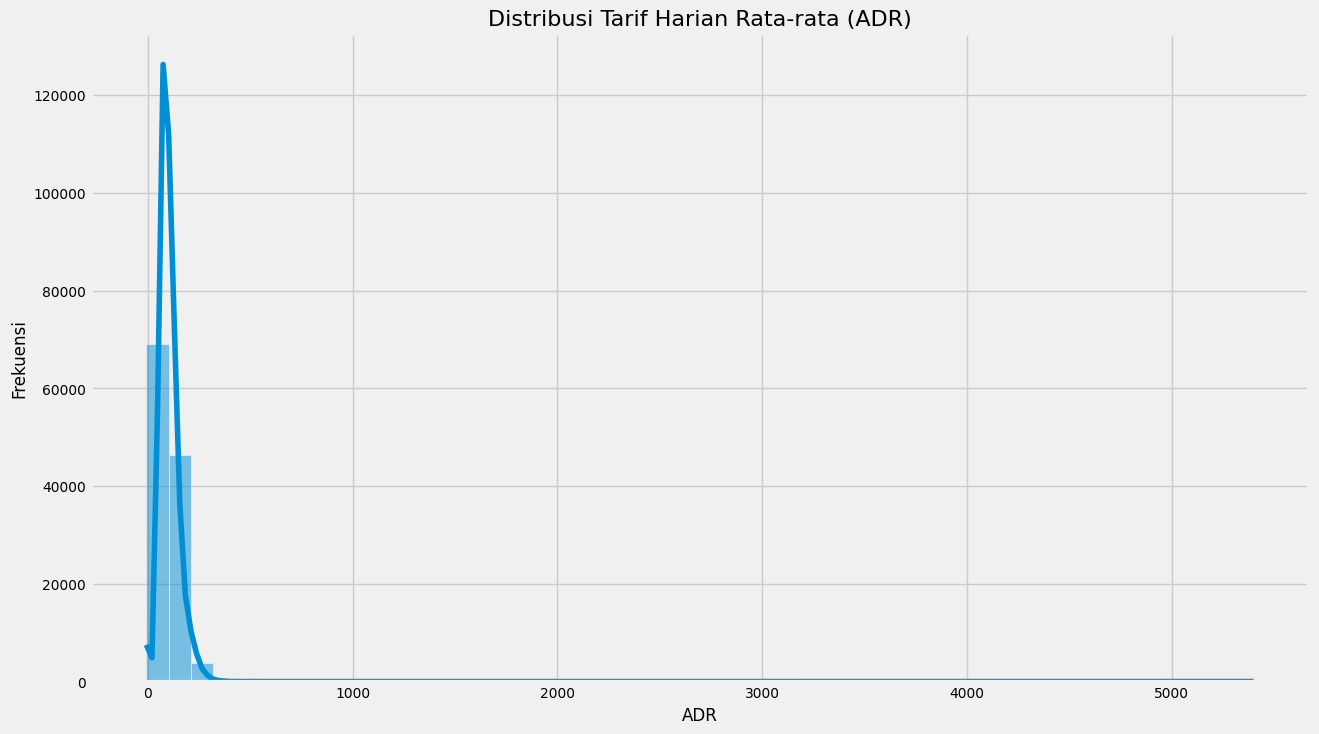

In [ ]:
# Distribusi tarif harian rata-rata (ADR)
plt.figure(figsize=(14, 8))
sns.histplot(df['adr'], kde=True, bins=50, palette='viridis')
plt.title('Distribusi Tarif Harian Rata-rata (ADR)', fontsize=16)
plt.xlabel('ADR', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3.3.8 Distribusi Lead Time

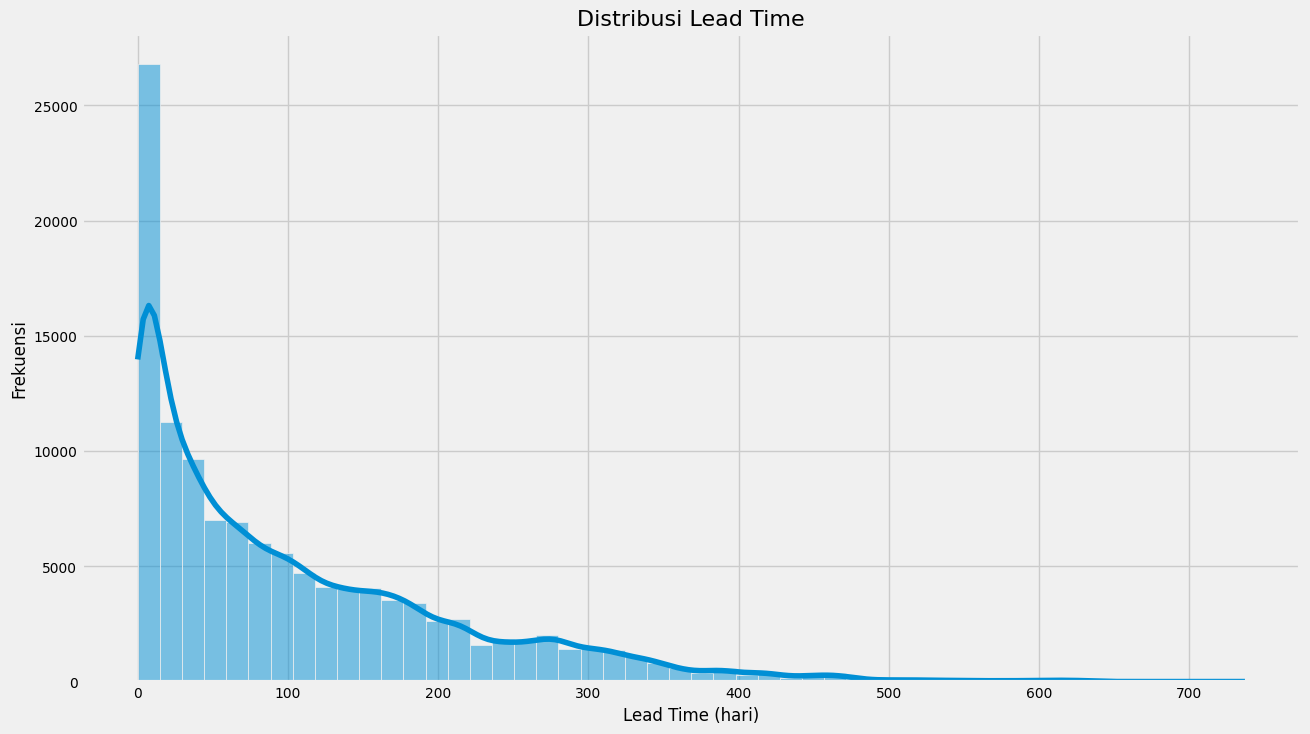

In [ ]:
# Distribusi lead time
plt.figure(figsize=(14, 8))
sns.histplot(df['lead_time'], kde=True, bins=50, palette='viridis')
plt.title('Distribusi Lead Time', fontsize=16)
plt.xlabel('Lead Time (hari)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3.3.9 Korelasi antar Fitur Numerik

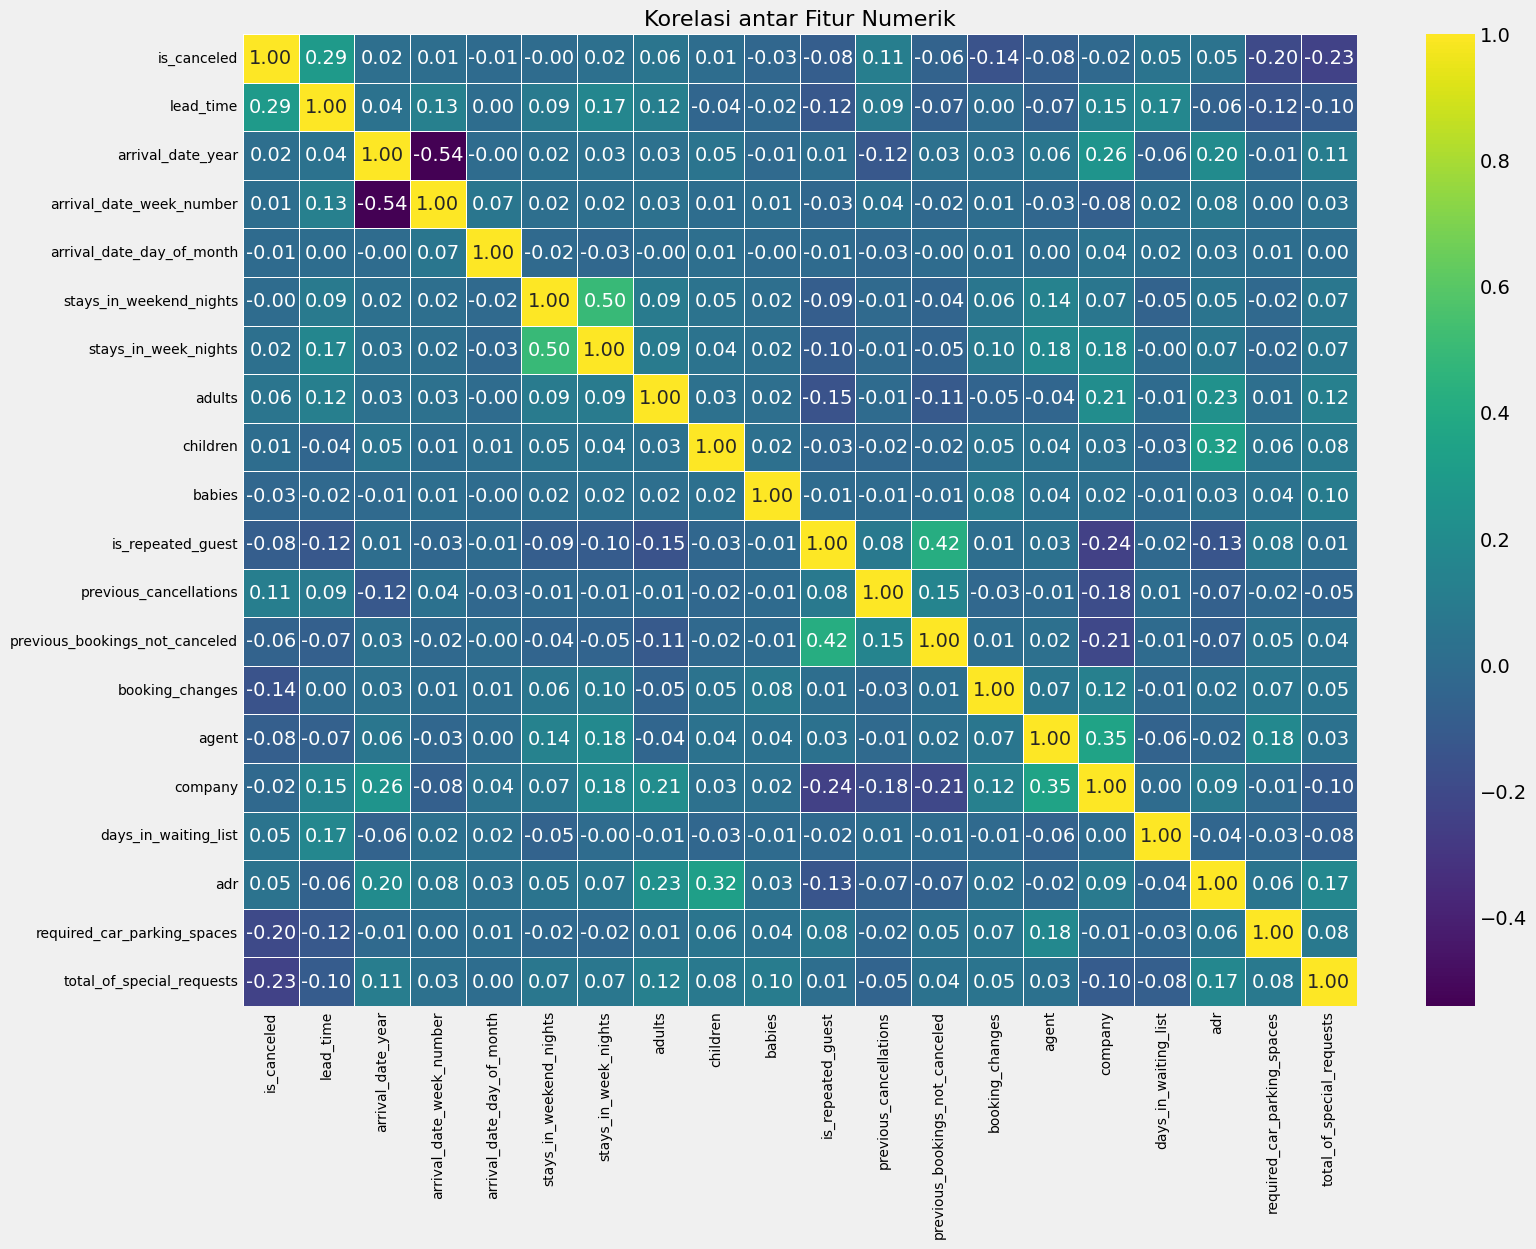

In [ ]:
# Korelasi antar fitur numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt='.2f')
plt.title('Korelasi antar Fitur Numerik', fontsize=16)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.show()

### 3.3.10 Analisis Tarif Harian Rata-rata (ADR) berdasarkan Jenis Hotel dan Bulan Kedatangan

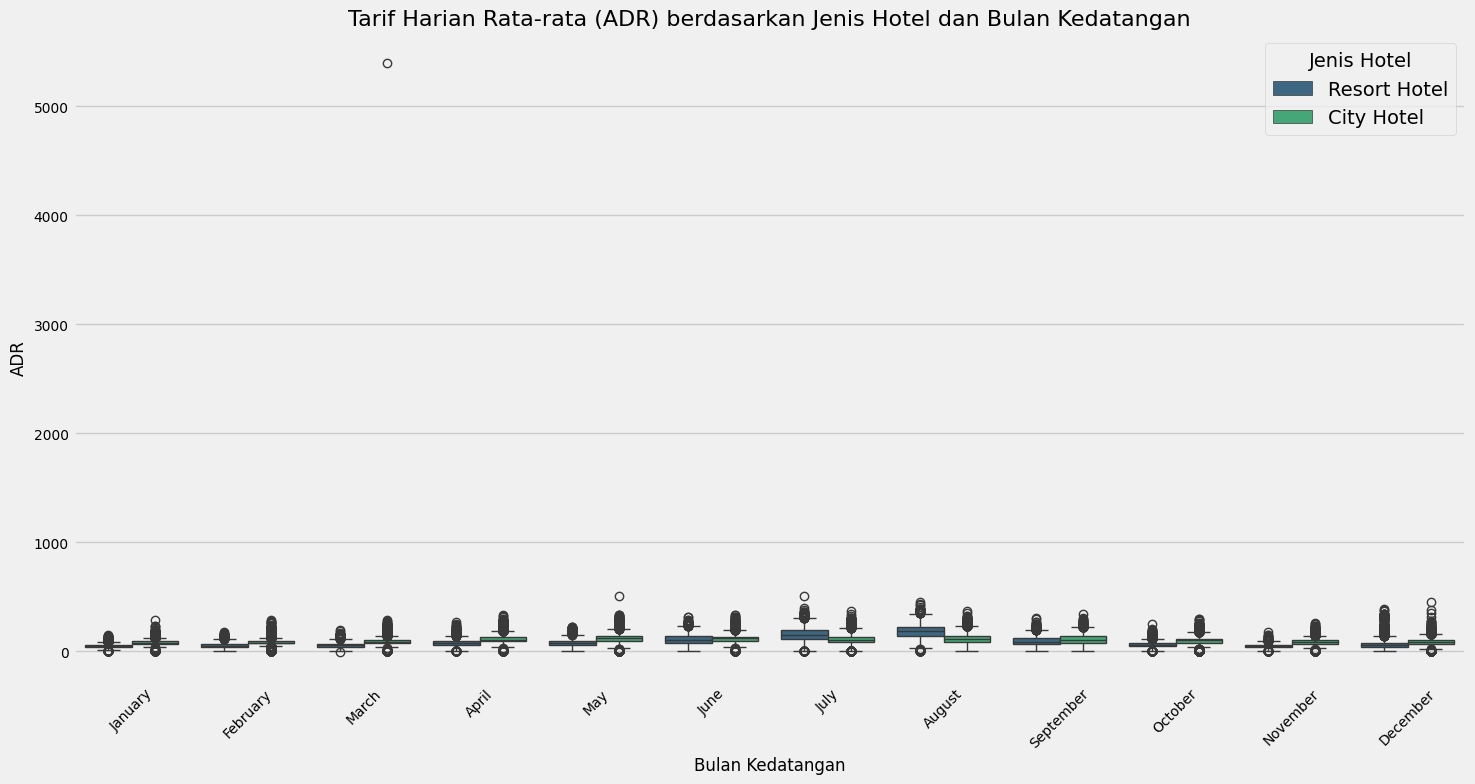

In [ ]:
# Analisis tarif harian rata-rata (ADR) berdasarkan jenis hotel dan bulan kedatangan
plt.figure(figsize=(16, 8))
sns.boxplot(x='arrival_date_month', y='adr', hue='hotel', data=df, palette='viridis',
            order=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Tarif Harian Rata-rata (ADR) berdasarkan Jenis Hotel dan Bulan Kedatangan', fontsize=16)
plt.xlabel('Bulan Kedatangan', fontsize=12)
plt.ylabel('ADR', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Jenis Hotel')
plt.show()

### 3.3.11 Analisis Pembatalan berdasarkan Lead Time

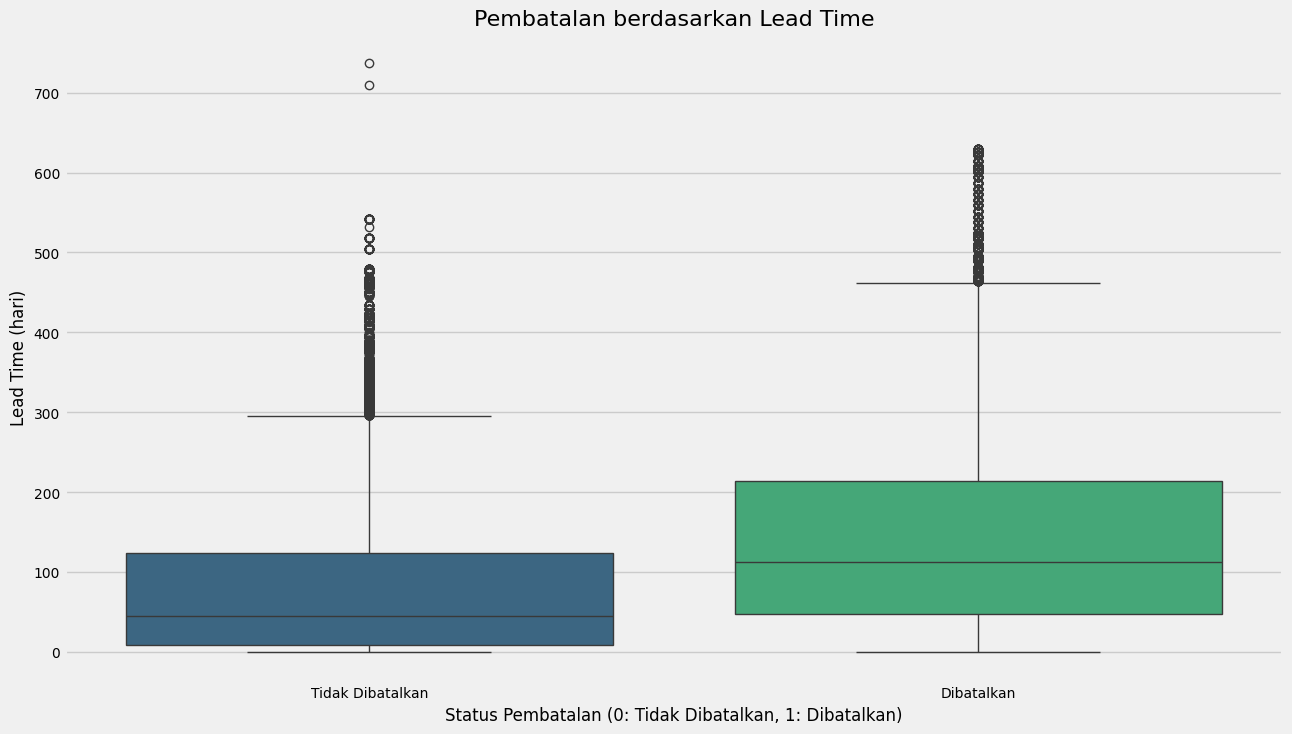

In [ ]:
# Analisis pembatalan berdasarkan lead time
plt.figure(figsize=(14, 8))
sns.boxplot(x='is_canceled', y='lead_time', data=df, palette='viridis')
plt.title('Pembatalan berdasarkan Lead Time', fontsize=16)
plt.xlabel('Status Pembatalan (0: Tidak Dibatalkan, 1: Dibatalkan)', fontsize=12)
plt.ylabel('Lead Time (hari)', fontsize=12)
plt.xticks([0, 1], ['Tidak Dibatalkan', 'Dibatalkan'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 3.3.12 Analisis Lama Menginap

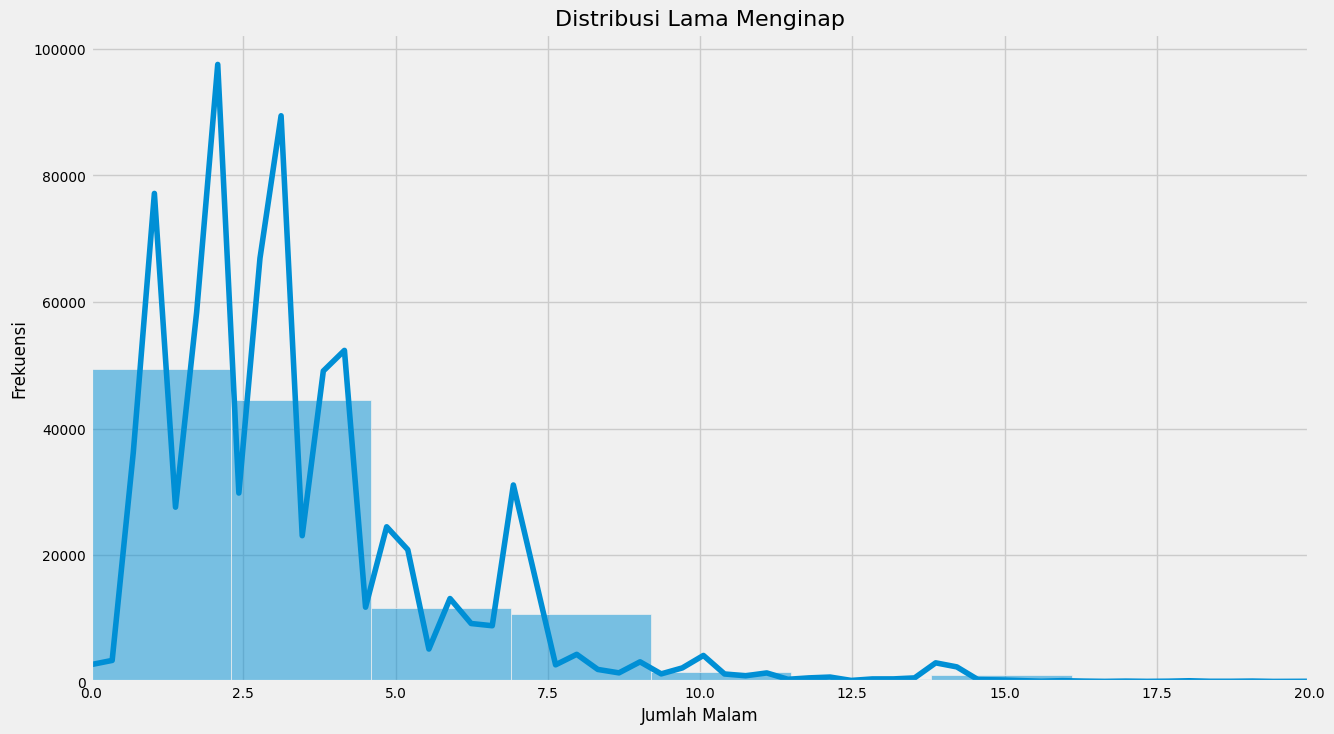

In [ ]:
# Menambahkan kolom total_nights untuk analisis lama menginap
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Analisis lama menginap
plt.figure(figsize=(14, 8))
sns.histplot(df['total_nights'], kde=True, bins=30, palette='viridis')
plt.title('Distribusi Lama Menginap', fontsize=16)
plt.xlabel('Jumlah Malam', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(0, 20)  # Membatasi tampilan untuk melihat pola yang lebih jelas
plt.show()

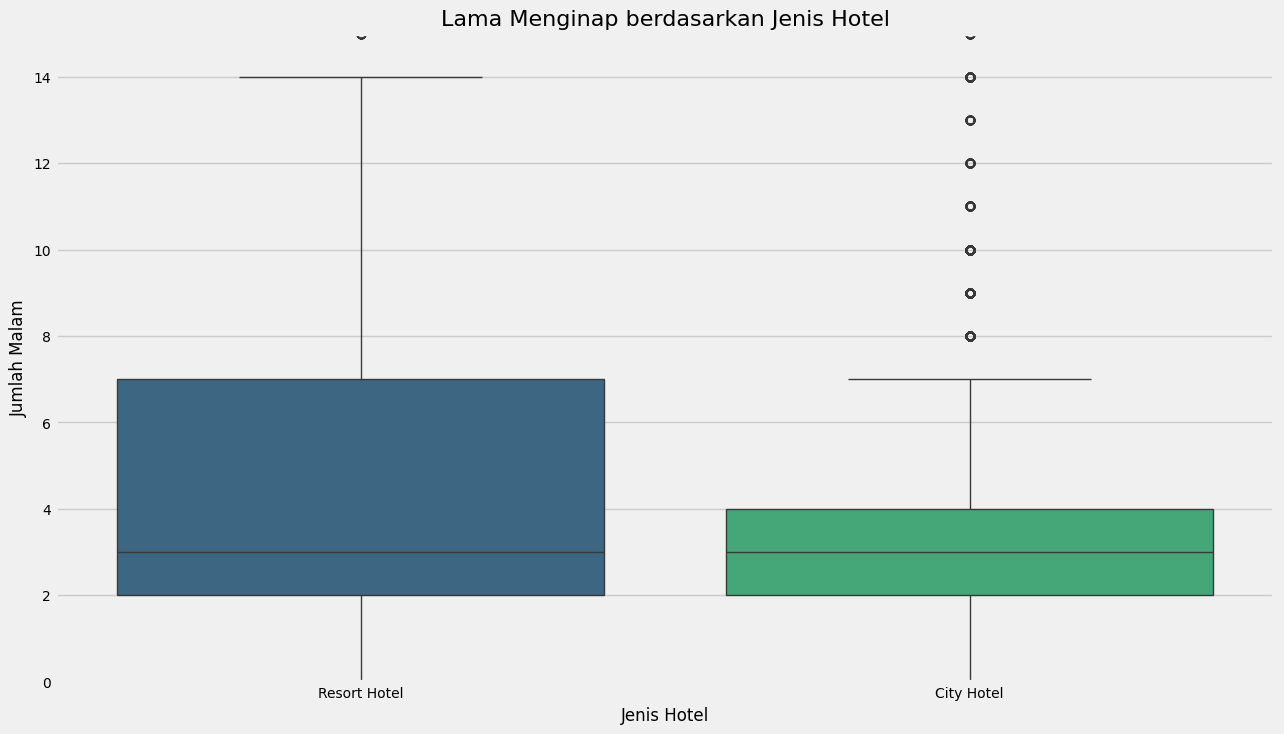

In [ ]:
# Analisis lama menginap berdasarkan jenis hotel
plt.figure(figsize=(14, 8))
sns.boxplot(x='hotel', y='total_nights', data=df, palette='viridis')
plt.title('Lama Menginap berdasarkan Jenis Hotel', fontsize=16)
plt.xlabel('Jenis Hotel', fontsize=12)
plt.ylabel('Jumlah Malam', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, 15)  # Membatasi tampilan untuk melihat pola yang lebih jelas
plt.show()

## Insight dari Eksplorasi Data

Berdasarkan eksplorasi data yang telah dilakukan, beberapa insight yang dapat diperoleh adalah:

1. **Distribusi Jenis Hotel**: City Hotel memiliki jumlah pemesanan yang lebih banyak dibandingkan Resort Hotel.

2. **Tingkat Pembatalan**: Sekitar 37% dari total pemesanan dibatalkan, yang merupakan angka yang cukup signifikan dan dapat mempengaruhi pendapatan hotel.

3. **Pola Musiman**: Terdapat pola musiman dalam pemesanan hotel, dengan puncak pemesanan terjadi pada bulan Juli dan Agustus (musim panas di belahan bumi utara).

4. **Segmen Pasar**: Segmen pasar "Online TA" (Online Travel Agency) mendominasi pemesanan, menunjukkan pentingnya platform online dalam industri perhotelan.

5. **Negara Asal Tamu**: Portugal (negara tempat hotel berada) merupakan negara asal tamu terbanyak, diikuti oleh negara-negara Eropa lainnya.

6. **Tarif Harian Rata-rata (ADR)**: Distribusi ADR menunjukkan variasi yang cukup besar, dengan beberapa outlier yang memiliki nilai sangat tinggi.

7. **Lead Time**: Pemesanan yang dibatalkan cenderung memiliki lead time yang lebih panjang, menunjukkan bahwa pemesanan yang dilakukan jauh-jauh hari memiliki risiko pembatalan yang lebih tinggi.

8. **Lama Menginap**: Sebagian besar tamu menginap untuk jangka waktu yang singkat (1-4 malam), dengan pola yang berbeda antara City Hotel dan Resort Hotel.

9. **Korelasi antar Fitur**: Terdapat beberapa korelasi yang menarik antar fitur, seperti korelasi positif antara lead time dan pembatalan, serta korelasi negatif antara is_repeated_guest dan pembatalan.

10. **Variasi Harga Musiman**: Tarif hotel bervariasi berdasarkan bulan, dengan Resort Hotel menunjukkan variasi yang lebih besar dibandingkan City Hotel.

# 4. Data Preparation

Pada bagian ini, kita akan melakukan persiapan data (data preparation) untuk memastikan data siap digunakan dalam analisis lanjutan atau pemodelan. Tahapan ini meliputi penanganan nilai yang hilang, penanganan outlier, pengkodean variabel kategorikal, rekayasa fitur, dan seleksi fitur.

## 4.1 Handling Missing Values

Pertama, kita akan menangani nilai yang hilang dalam dataset. Berdasarkan analisis sebelumnya, terdapat beberapa kolom yang memiliki nilai yang hilang.

In [ ]:
# Import library tambahan yang diperlukan
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Menampilkan jumlah nilai yang hilang sebelum penanganan
print("Jumlah nilai yang hilang sebelum penanganan:")
print(df.isnull().sum())

Jumlah nilai yang hilang sebelum penanganan:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent       

In [ ]:
# Menangani nilai yang hilang pada kolom 'children'
# Mengisi dengan nilai 0 karena sebagian besar pemesanan tidak melibatkan anak-anak
df['children'] = df['children'].fillna(0)

# Menangani nilai yang hilang pada kolom 'country'
# Mengisi dengan 'Unknown' untuk menunjukkan bahwa negara asal tamu tidak diketahui
df['country'] = df['country'].fillna('Unknown')

# Menangani nilai yang hilang pada kolom 'agent'
# Mengisi dengan 0 untuk menunjukkan bahwa pemesanan tidak dilakukan melalui agen
df['agent'] = df['agent'].fillna(0)

# Menangani nilai yang hilang pada kolom 'company'
# Mengisi dengan 0 untuk menunjukkan bahwa pemesanan tidak dilakukan melalui perusahaan
df['company'] = df['company'].fillna(0)

# Menampilkan jumlah nilai yang hilang setelah penanganan
print("\nJumlah nilai yang hilang setelah penanganan:")
print(df.isnull().sum())


Jumlah nilai yang hilang setelah penanganan:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type     

## 4.2 Handling Outliers

Selanjutnya, kita akan menangani outlier dalam dataset. Outlier adalah nilai yang sangat berbeda dari nilai-nilai lainnya dan dapat mempengaruhi analisis atau model yang dibangun.

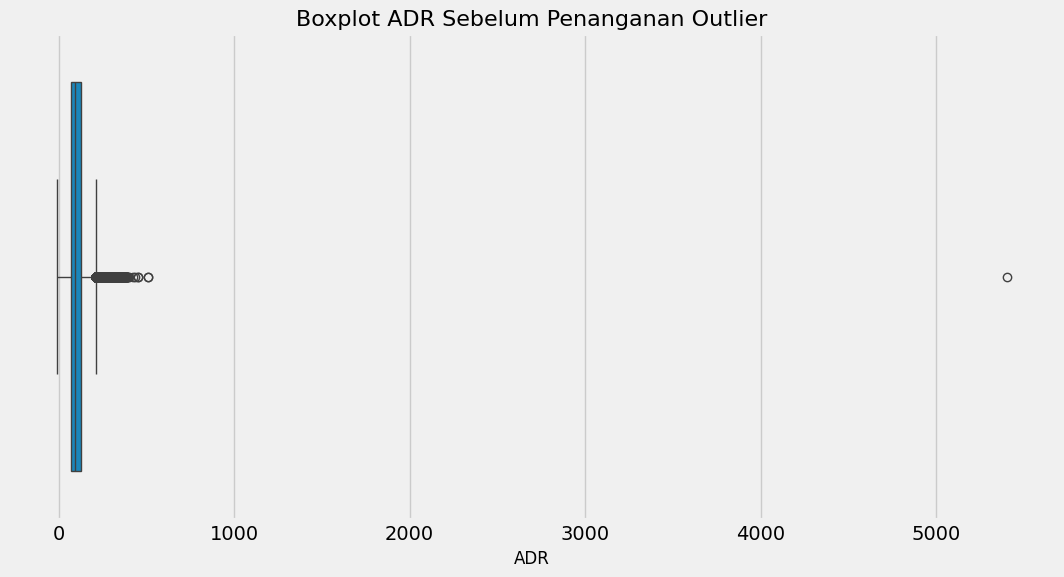

In [ ]:
# Visualisasi outlier pada kolom 'adr' (Average Daily Rate)
plt.figure(figsize=(12, 6))
sns.boxplot(x='adr', data=df)
plt.title('Boxplot ADR Sebelum Penanganan Outlier', fontsize=16)
plt.xlabel('ADR', fontsize=12)
plt.show()

Membatasi nilai ADR maksimum pada 275.00


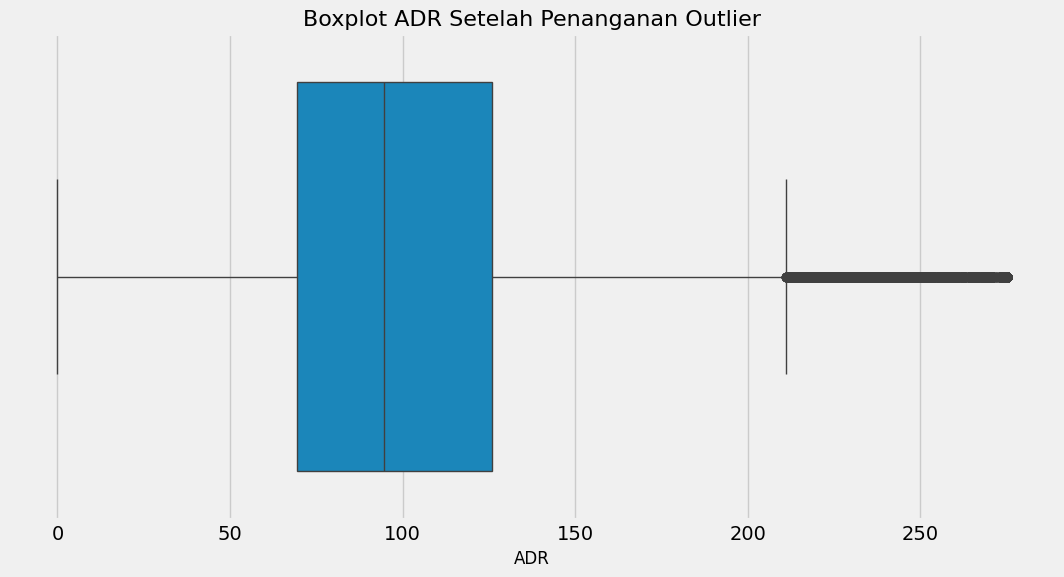

In [ ]:
# Menangani outlier pada kolom 'adr'
# Nilai negatif tidak masuk akal untuk ADR, jadi kita batasi nilai minimum ke 0
df['adr'] = df['adr'].clip(lower=0)

# Membatasi nilai maksimum ADR menggunakan persentil ke-99.5
adr_upper_bound = df['adr'].quantile(0.995)
df['adr'] = df['adr'].clip(upper=adr_upper_bound)
print(f"Membatasi nilai ADR maksimum pada {adr_upper_bound:.2f}")

# Visualisasi setelah penanganan outlier
plt.figure(figsize=(12, 6))
sns.boxplot(x='adr', data=df)
plt.title('Boxplot ADR Setelah Penanganan Outlier', fontsize=16)
plt.xlabel('ADR', fontsize=12)
plt.show()

Membatasi jumlah maksimum orang dewasa per kamar pada 5


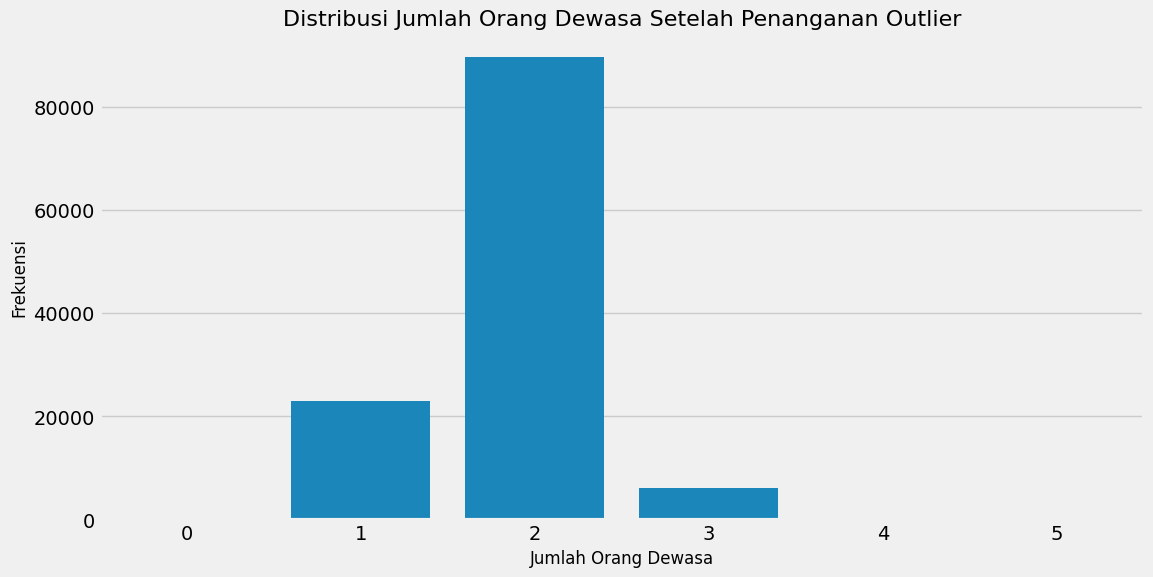

In [ ]:
# Menangani outlier pada kolom 'adults'
# Membatasi jumlah maksimum orang dewasa per kamar (5 orang dewasa per kamar adalah batas yang masuk akal)
df['adults'] = df['adults'].clip(upper=5)
print("Membatasi jumlah maksimum orang dewasa per kamar pada 5")

# Visualisasi setelah penanganan outlier
plt.figure(figsize=(12, 6))
sns.countplot(x='adults', data=df)
plt.title('Distribusi Jumlah Orang Dewasa Setelah Penanganan Outlier', fontsize=16)
plt.xlabel('Jumlah Orang Dewasa', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

Membatasi nilai lead time maksimum pada 444 hari


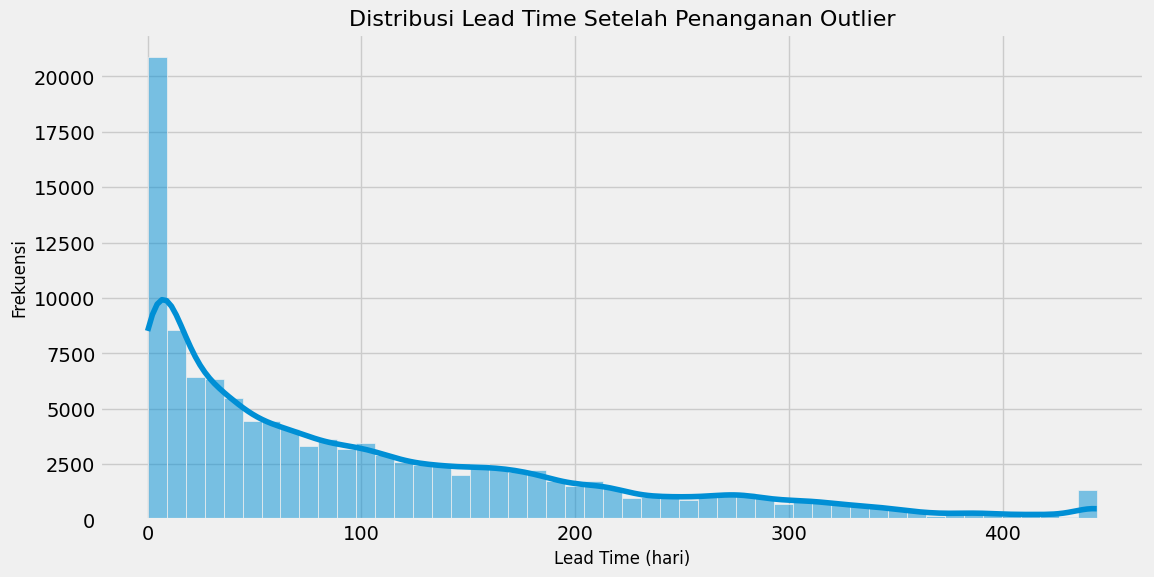

In [ ]:
# Menangani outlier pada kolom 'lead_time'
# Membatasi nilai maksimum lead time menggunakan persentil ke-99
lead_time_upper_bound = df['lead_time'].quantile(0.99)
df['lead_time'] = df['lead_time'].clip(upper=lead_time_upper_bound)
print(f"Membatasi nilai lead time maksimum pada {lead_time_upper_bound:.0f} hari")

# Visualisasi setelah penanganan outlier
plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], kde=True, bins=50)
plt.title('Distribusi Lead Time Setelah Penanganan Outlier', fontsize=16)
plt.xlabel('Lead Time (hari)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.show()

## 4.3 Encoding Categorical Variables

Selanjutnya, kita akan melakukan pengkodean variabel kategorikal agar dapat digunakan dalam analisis lanjutan atau pemodelan.

In [ ]:
# Melihat kolom-kolom kategorikal dalam dataset
categorical_columns = df.select_dtypes(include=['object']).columns
print("Kolom-kolom kategorikal dalam dataset:")
print(categorical_columns.tolist())

Kolom-kolom kategorikal dalam dataset:
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [ ]:
# Pengkodean untuk kolom 'hotel'
print("Pengkodean untuk kolom 'hotel':")
df['hotel'].unique()
df['hotel_encoded'] = df['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})
print("Hasil pengkodean:")
df[['hotel', 'hotel_encoded']].head()

Pengkodean untuk kolom 'hotel':
Hasil pengkodean:


,hotel,hotel_encoded
0,Resort Hotel,0
1,Resort Hotel,0
2,Resort Hotel,0
3,Resort Hotel,0
4,Resort Hotel,0


In [ ]:
# Pengkodean untuk kolom 'meal'
print("Pengkodean untuk kolom 'meal':")
df['meal'].unique()
meal_mapping = {'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}
df['meal_encoded'] = df['meal'].map(meal_mapping)
print("Hasil pengkodean:")
df[['meal', 'meal_encoded']].head()

Pengkodean untuk kolom 'meal':
Hasil pengkodean:


,meal,meal_encoded
0,BB,0
1,BB,0
2,BB,0
3,BB,0
4,BB,0


In [ ]:
# Pengkodean untuk kolom 'market_segment'
print("Pengkodean untuk kolom 'market_segment':")
df['market_segment'].unique()
market_segment_mapping = {
    'Direct': 0,
    'Corporate': 1,
    'Online TA': 2,
    'Offline TA/TO': 3,
    'Complementary': 4,
    'Groups': 5,
    'Undefined': 6,
    'Aviation': 7
}
df['market_segment_encoded'] = df['market_segment'].map(market_segment_mapping)
print("Hasil pengkodean:")
df[['market_segment', 'market_segment_encoded']].head()

Pengkodean untuk kolom 'market_segment':
Hasil pengkodean:


,market_segment,market_segment_encoded
0,Direct,0
1,Direct,0
2,Direct,0
3,Corporate,1
4,Online TA,2


In [ ]:
# Pengkodean untuk kolom 'distribution_channel'
print("Pengkodean untuk kolom 'distribution_channel':")
df['distribution_channel'].unique()
distribution_channel_mapping = {
    'Direct': 0,
    'Corporate': 1,
    'TA/TO': 2,
    'Undefined': 3,
    'GDS': 4
}
df['distribution_channel_encoded'] = df['distribution_channel'].map(distribution_channel_mapping)
print("Hasil pengkodean:")
df[['distribution_channel', 'distribution_channel_encoded']].head()

Pengkodean untuk kolom 'distribution_channel':
Hasil pengkodean:


,distribution_channel,distribution_channel_encoded
0,Direct,0
1,Direct,0
2,Direct,0
3,Corporate,1
4,TA/TO,2


In [ ]:
# Pengkodean untuk kolom 'reserved_room_type' dan 'assigned_room_type'
print("Pengkodean untuk kolom 'reserved_room_type' dan 'assigned_room_type':")
print("Tipe kamar yang dipesan:", df['reserved_room_type'].unique())
print("Tipe kamar yang diberikan:", df['assigned_room_type'].unique())

# Membuat mapping untuk tipe kamar
room_types = sorted(list(set(df['reserved_room_type'].unique()) | set(df['assigned_room_type'].unique())))
room_type_mapping = {room: idx for idx, room in enumerate(room_types)}

df['reserved_room_type_encoded'] = df['reserved_room_type'].map(room_type_mapping)
df['assigned_room_type_encoded'] = df['assigned_room_type'].map(room_type_mapping)

print("Hasil pengkodean:")
df[['reserved_room_type', 'reserved_room_type_encoded',
          'assigned_room_type', 'assigned_room_type_encoded']].head()

Pengkodean untuk kolom 'reserved_room_type' dan 'assigned_room_type':
Tipe kamar yang dipesan: ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
Tipe kamar yang diberikan: ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']
Hasil pengkodean:


,reserved_room_type,reserved_room_type_encoded,assigned_room_type,assigned_room_type_encoded
0,C,2,C,2
1,C,2,C,2
2,A,0,C,2
3,A,0,A,0
4,A,0,A,0


In [ ]:
# Pengkodean untuk kolom 'deposit_type'
print("Pengkodean untuk kolom 'deposit_type':")
print(df['deposit_type'].unique())
deposit_type_mapping = {
    'No Deposit': 0,
    'Refundable': 1,
    'Non Refund': 2
}
df['deposit_type_encoded'] = df['deposit_type'].map(deposit_type_mapping)
print("Hasil pengkodean:")
df[['deposit_type', 'deposit_type_encoded']].head()

Pengkodean untuk kolom 'deposit_type':
['No Deposit' 'Refundable' 'Non Refund']
Hasil pengkodean:


,deposit_type,deposit_type_encoded
0,No Deposit,0
1,No Deposit,0
2,No Deposit,0
3,No Deposit,0
4,No Deposit,0


In [ ]:
# Pengkodean untuk kolom 'customer_type'
print("Pengkodean untuk kolom 'customer_type':")
df['customer_type'].unique()
customer_type_mapping = {
    'Transient': 0,
    'Contract': 1,
    'Transient-Party': 2,
    'Group': 3
}
df['customer_type_encoded'] = df['customer_type'].map(customer_type_mapping)
print("Hasil pengkodean:")
df[['customer_type', 'customer_type_encoded']].head()

Pengkodean untuk kolom 'customer_type':
Hasil pengkodean:


,customer_type,customer_type_encoded
0,Transient,0
1,Transient,0
2,Transient,0
3,Transient,0
4,Transient,0


In [ ]:
# Pengkodean untuk kolom 'reservation_status'
print("Pengkodean untuk kolom 'reservation_status':")
df['reservation_status'].unique()
reservation_status_mapping = {
    'Check-Out': 0,
    'Canceled': 1,
    'No-Show': 2
}
df['reservation_status_encoded'] = df['reservation_status'].map(reservation_status_mapping)
print("Hasil pengkodean:")
df[['reservation_status', 'reservation_status_encoded']].head()

Pengkodean untuk kolom 'reservation_status':
Hasil pengkodean:


,reservation_status,reservation_status_encoded
0,Check-Out,0
1,Check-Out,0
2,Check-Out,0
3,Check-Out,0
4,Check-Out,0


In [ ]:
# Pengkodean untuk kolom 'country'
# Karena terlalu banyak kategori, kita akan menggunakan label encoding
country_mapping = {country: idx for idx, country in enumerate(df['country'].unique())}
df['country_encoded'] = df['country'].map(country_mapping)
print(f"Pengkodean untuk kolom 'country' dengan {len(country_mapping)} nilai unik")
print("Contoh hasil pengkodean:")
df[['country', 'country_encoded']].head()

Pengkodean untuk kolom 'country' dengan 178 nilai unik
Contoh hasil pengkodean:


,country,country_encoded
0,PRT,0
1,PRT,0
2,GBR,1
3,GBR,1
4,GBR,1


In [ ]:
# Pengkodean untuk kolom 'arrival_date_month'
print("Pengkodean untuk kolom 'arrival_date_month':")
df['arrival_date_month'].unique()
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
df['arrival_date_month_encoded'] = df['arrival_date_month'].map(month_mapping)
print("Hasil pengkodean:")
df[['arrival_date_month', 'arrival_date_month_encoded']].head()

Pengkodean untuk kolom 'arrival_date_month':
Hasil pengkodean:


,arrival_date_month,arrival_date_month_encoded
0,July,7
1,July,7
2,July,7
3,July,7
4,July,7


In [ ]:
# Mengonversi kolom 'reservation_status_date' menjadi datetime dan mengekstrak fitur
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['status_year'] = df['reservation_status_date'].dt.year
df['status_month'] = df['reservation_status_date'].dt.month
df['status_day'] = df['reservation_status_date'].dt.day
print("Hasil ekstraksi fitur dari 'reservation_status_date':")
df[['reservation_status_date', 'status_year', 'status_month', 'status_day']].head()

Hasil ekstraksi fitur dari 'reservation_status_date':


,reservation_status_date,status_year,status_month,status_day
0,2015-07-01,2015,7,1
1,2015-07-01,2015,7,1
2,2015-07-02,2015,7,2
3,2015-07-02,2015,7,2
4,2015-07-03,2015,7,3


## 4.4 Feature Engineering

Pada bagian ini, kita akan melakukan rekayasa fitur untuk menciptakan fitur-fitur baru yang mungkin berguna dalam analisis atau pemodelan.

In [ ]:
# Membuat fitur 'total_nights' (jumlah total malam menginap)
# Catatan: Fitur ini sudah dibuat sebelumnya dalam analisis EDA
print("Fitur 'total_nights' (sudah dibuat sebelumnya):")
df[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_nights']].head()

Fitur 'total_nights' (sudah dibuat sebelumnya):


,stays_in_weekend_nights,stays_in_week_nights,total_nights
0,0,0,0
1,0,0,0
2,0,1,1
3,0,1,1
4,0,2,2


In [ ]:
# Membuat fitur 'total_guests' (jumlah total tamu)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print("Fitur 'total_guests':")
df[['adults', 'children', 'babies', 'total_guests']].head()

Fitur 'total_guests':


,adults,children,babies,total_guests
0,2,0.0,0,2.0
1,2,0.0,0,2.0
2,1,0.0,0,1.0
3,1,0.0,0,1.0
4,2,0.0,0,2.0


In [ ]:
# Membuat fitur 'is_high_season' (apakah pemesanan dilakukan pada musim tinggi)
high_season_months = ['July', 'August', 'December']
df['is_high_season'] = df['arrival_date_month'].apply(lambda x: 1 if x in high_season_months else 0)
print("Fitur 'is_high_season':")
df[['arrival_date_month', 'is_high_season']].head()

Fitur 'is_high_season':


,arrival_date_month,is_high_season
0,July,1
1,July,1
2,July,1
3,July,1
4,July,1


In [ ]:
# Membuat fitur 'lead_time_category' (kategori lead time)
df['lead_time_category'] = pd.cut(
    df['lead_time'],
    bins=[0, 30, 90, float('inf')],
    labels=['short', 'medium', 'long']
)
print("Fitur 'lead_time_category':")
df[['lead_time', 'lead_time_category']].head()

Fitur 'lead_time_category':


,lead_time,lead_time_category
0,342,long
1,444,long
2,7,short
3,13,short
4,14,short


In [ ]:
# Membuat fitur 'is_weekend_arrival' (apakah kedatangan pada akhir pekan)
# Menggunakan informasi dari arrival_date_day_of_month dan arrival_date_week_number
# Catatan: Ini adalah pendekatan sederhana, idealnya kita perlu informasi hari dalam seminggu
df['is_weekend_arrival'] = ((df['arrival_date_day_of_month'] % 7) >= 5).astype(int)
print("Fitur 'is_weekend_arrival':")
df[['arrival_date_day_of_month', 'is_weekend_arrival']].head()

Fitur 'is_weekend_arrival':


,arrival_date_day_of_month,is_weekend_arrival
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
# Membuat fitur 'has_special_requests' (apakah ada permintaan khusus)
df['has_special_requests'] = (df['total_of_special_requests'] > 0).astype(int)
print("Fitur 'has_special_requests':")
df[['total_of_special_requests', 'has_special_requests']].head()

Fitur 'has_special_requests':


,total_of_special_requests,has_special_requests
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1


In [ ]:
# Membuat fitur 'is_repeated_guest_with_previous_cancellations'
# Menunjukkan apakah tamu berulang yang pernah membatalkan pemesanan sebelumnya
df['is_repeated_guest_with_previous_cancellations'] = ((df['is_repeated_guest'] == 1) &
                                                      (df['previous_cancellations'] > 0)).astype(int)
print("Fitur 'is_repeated_guest_with_previous_cancellations':")
df[['is_repeated_guest', 'previous_cancellations',
          'is_repeated_guest_with_previous_cancellations']].head()

Fitur 'is_repeated_guest_with_previous_cancellations':


,is_repeated_guest,previous_cancellations,is_repeated_guest_with_previous_cancellations
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [ ]:
# Membuat fitur 'price_per_person' (harga per orang)
# Menghindari pembagian dengan nol
df['price_per_person'] = df['adr'] / df['total_guests'].replace(0, 1)
print("Fitur 'price_per_person':")
df[['adr', 'total_guests', 'price_per_person']].head()

Fitur 'price_per_person':


,adr,total_guests,price_per_person
0,0.0,2.0,0.0
1,0.0,2.0,0.0
2,75.0,1.0,75.0
3,75.0,1.0,75.0
4,98.0,2.0,49.0


In [ ]:
# Membuat fitur 'room_assignment_match' (apakah tipe kamar yang dipesan sama dengan yang diberikan)
df['room_assignment_match'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)
print("Fitur 'room_assignment_match':")
df[['reserved_room_type', 'assigned_room_type', 'room_assignment_match']].head()

Fitur 'room_assignment_match':


,reserved_room_type,assigned_room_type,room_assignment_match
0,C,C,1
1,C,C,1
2,A,C,0
3,A,A,1
4,A,A,1


## 4.5 Feature Selection

Pada bagian ini, kita akan melakukan seleksi fitur untuk memilih fitur-fitur yang paling relevan untuk analisis atau pemodelan.

In [ ]:
# Membuat dataset untuk seleksi fitur
# Menghapus kolom yang tidak diperlukan atau redundan
columns_to_drop = [
    'reservation_status_date',  # Sudah diekstrak menjadi fitur terpisah
    'arrival_date_month',       # Sudah dienkode
    'hotel',                    # Sudah dienkode
    'meal',                     # Sudah dienkode
    'market_segment',           # Sudah dienkode
    'distribution_channel',     # Sudah dienkode
    'reserved_room_type',       # Sudah dienkode
    'assigned_room_type',       # Sudah dienkode
    'deposit_type',             # Sudah dienkode
    'customer_type',            # Sudah dienkode
    'reservation_status',       # Sudah dienkode
    'country',                  # Sudah dienkode
    'lead_time_category'        # Kategorikal, tidak bisa digunakan dalam seleksi fitur numerik
]

# Membuat salinan dataset untuk seleksi fitur
df_for_selection = df.drop(columns=columns_to_drop)

# Menampilkan kolom yang tersisa
print("Kolom yang tersisa untuk seleksi fitur:")
print(df_for_selection.columns.tolist())

Kolom yang tersisa untuk seleksi fitur:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights', 'hotel_encoded', 'meal_encoded', 'market_segment_encoded', 'distribution_channel_encoded', 'reserved_room_type_encoded', 'assigned_room_type_encoded', 'deposit_type_encoded', 'customer_type_encoded', 'reservation_status_encoded', 'country_encoded', 'arrival_date_month_encoded', 'status_year', 'status_month', 'status_day', 'total_guests', 'is_high_season', 'is_weekend_arrival', 'has_special_requests', 'is_repeated_guest_with_previous_cancellations', 'price_per_person', 'room_assignment_match']


In [ ]:
# Menentukan variabel target (dalam hal ini, 'is_canceled')
y = df_for_selection['is_canceled']

# Menghapus variabel target dari dataset fitur
X = df_for_selection.drop('is_canceled', axis=1)

# Menangani kolom non-numerik yang tersisa (jika ada)
X = X.select_dtypes(include=['int64', 'float64'])

# Menampilkan kolom numerik yang akan digunakan dalam seleksi fitur
print("Kolom numerik yang akan digunakan dalam seleksi fitur:")
print(X.columns.tolist())

Kolom numerik yang akan digunakan dalam seleksi fitur:
['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights', 'hotel_encoded', 'meal_encoded', 'market_segment_encoded', 'distribution_channel_encoded', 'reserved_room_type_encoded', 'assigned_room_type_encoded', 'deposit_type_encoded', 'customer_type_encoded', 'reservation_status_encoded', 'country_encoded', 'arrival_date_month_encoded', 'total_guests', 'is_high_season', 'is_weekend_arrival', 'has_special_requests', 'is_repeated_guest_with_previous_cancellations', 'price_per_person', 'room_assignment_match']


In [ ]:
# Melakukan seleksi fitur menggunakan ANOVA F-value
k = 15  # Memilih 15 fitur teratas
selector = SelectKBest(f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Mendapatkan nama fitur yang terpilih
selected_feature_mask = selector.get_support()
selected_features = X.columns[selected_feature_mask]

print(f"Fitur teratas {k} berdasarkan ANOVA F-value:")
print(selected_features.tolist())

Fitur teratas 15 berdasarkan ANOVA F-value:
['lead_time', 'previous_cancellations', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'hotel_encoded', 'market_segment_encoded', 'distribution_channel_encoded', 'assigned_room_type_encoded', 'deposit_type_encoded', 'customer_type_encoded', 'reservation_status_encoded', 'country_encoded', 'has_special_requests', 'room_assignment_match']


In [ ]:
# Menampilkan skor untuk setiap fitur
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)
print("Skor untuk setiap fitur:")
print(feature_scores.head(15))

Skor untuk setiap fitur:
                         Feature         Score
28    reservation_status_encoded  2.987937e+06
26          deposit_type_encoded  3.582600e+04
0                      lead_time  1.125940e+04
34          has_special_requests  8.995770e+03
37         room_assignment_match  7.808619e+03
22        market_segment_encoded  7.190119e+03
18     total_of_special_requests  6.957101e+03
17   required_car_parking_spaces  4.744260e+03
25    assigned_room_type_encoded  3.817619e+03
23  distribution_channel_encoded  3.541256e+03
12               booking_changes  2.541731e+03
20                 hotel_encoded  2.267759e+03
27         customer_type_encoded  2.243727e+03
10        previous_cancellations  1.465865e+03
29               country_encoded  1.216907e+03


In [ ]:
# Membuat dataset final dengan fitur yang terpilih dan variabel target
final_df = pd.concat([X[selected_features], y], axis=1)
print("Dataset final dengan fitur terpilih:")
print(final_df.head())
print("\nUkuran dataset final:", final_df.shape)

Dataset final dengan fitur terpilih:
   lead_time  previous_cancellations  booking_changes  \
0        342                       0                3   
1        444                       0                4   
2          7                       0                0   
3         13                       0                0   
4         14                       0                0   

   required_car_parking_spaces  total_of_special_requests  hotel_encoded  \
0                            0                          0              0   
1                            0                          0              0   
2                            0                          0              0   
3                            0                          0              0   
4                            0                          1              0   

   market_segment_encoded  distribution_channel_encoded  \
0                       0                             0   
1                       0                    

# 5. Conclusion

## Keputusan yang Diambil dalam Preprocessing dan Alasannya

1. **Handling Missing Values**:
   - Mengisi nilai yang hilang pada kolom 'children' dengan 0, dengan asumsi bahwa jika tidak ada informasi tentang jumlah anak, maka tidak ada anak dalam pemesanan.
   - Mengisi nilai yang hilang pada kolom 'country' dengan "Unknown", menunjukkan bahwa negara asal tamu tidak diketahui.
   - Mengisi nilai yang hilang pada kolom 'agent' dan 'company' dengan 0, menunjukkan bahwa pemesanan tidak dilakukan melalui agen atau perusahaan.
   - Alasan: Pendekatan ini memungkinkan kita untuk mempertahankan semua baris data tanpa menghapus informasi yang berharga.

2. **Handling Outliers**:
   - Membatasi nilai ADR (Average Daily Rate) pada rentang yang masuk akal, dengan nilai minimum 0 dan nilai maksimum pada persentil ke-99.5.
   - Membatasi jumlah orang dewasa per kamar pada maksimum 5 orang, yang merupakan batas yang masuk akal untuk kebanyakan kamar hotel.
   - Membatasi nilai lead time pada persentil ke-99, untuk menghilangkan nilai ekstrem yang mungkin merupakan kesalahan.
   - Alasan: Outlier dapat mempengaruhi analisis dan model yang dibangun, terutama model yang sensitif terhadap outlier seperti regresi linear.

3. **Encoding Categorical Variables**:
   - Menggunakan label encoding untuk kolom dengan kategori yang memiliki urutan atau hierarki, seperti 'arrival_date_month'.
   - Menggunakan label encoding untuk kolom dengan banyak kategori, seperti 'country'.
   - Menggunakan mapping manual untuk kolom dengan sedikit kategori, seperti 'hotel', 'meal', 'market_segment', dll.
   - Alasan: Pengkodean variabel kategorikal diperlukan agar data dapat digunakan dalam analisis lanjutan atau pemodelan. Metode pengkodean dipilih berdasarkan karakteristik setiap kolom.

4. **Feature Engineering**:
   - Membuat fitur 'total_nights' untuk menggabungkan informasi dari 'stays_in_weekend_nights' dan 'stays_in_week_nights'.
   - Membuat fitur 'total_guests' untuk menggabungkan informasi dari 'adults', 'children', dan 'babies'.
   - Membuat fitur 'is_high_season' untuk menandai pemesanan yang dilakukan pada musim tinggi.
   - Membuat fitur 'lead_time_category' untuk mengkategorikan lead time menjadi 'short', 'medium', dan 'long'.
   - Membuat fitur 'is_weekend_arrival' untuk menandai kedatangan pada akhir pekan.
   - Membuat fitur 'has_special_requests' untuk menandai pemesanan dengan permintaan khusus.
   - Membuat fitur 'is_repeated_guest_with_previous_cancellations' untuk menandai tamu berulang yang pernah membatalkan pemesanan sebelumnya.
   - Membuat fitur 'price_per_person' untuk menghitung harga per orang.
   - Membuat fitur 'room_assignment_match' untuk menandai apakah tipe kamar yang dipesan sama dengan yang diberikan.
   - Alasan: Rekayasa fitur dapat membantu mengungkapkan pola atau hubungan yang tidak terlihat dalam data asli, dan dapat meningkatkan performa model.

5. **Feature Selection**:
   - Menggunakan ANOVA F-value untuk memilih 15 fitur teratas yang paling relevan dengan variabel target 'is_canceled'.
   - Alasan: Seleksi fitur dapat membantu mengurangi dimensi data, menghilangkan fitur yang tidak relevan, dan meningkatkan performa model.

## Insight dari Preprocessing

1. **Fitur Penting untuk Prediksi Pembatalan**:
   - Berdasarkan seleksi fitur, beberapa fitur yang paling penting untuk memprediksi pembatalan pemesanan adalah 'lead_time', 'deposit_type_encoded', 'total_of_special_requests', dan 'previous_cancellations'.
   - Ini menunjukkan bahwa faktor-faktor seperti seberapa jauh hari pemesanan dilakukan sebelum kedatangan, jenis deposit yang dibayarkan, jumlah permintaan khusus, dan riwayat pembatalan sebelumnya memiliki pengaruh signifikan terhadap kemungkinan pembatalan.

2. **Pola Musiman**:
   - Fitur 'is_high_season' dan 'arrival_date_month_encoded' juga penting, menunjukkan bahwa ada pola musiman dalam pembatalan pemesanan.
   - Pemesanan pada musim tinggi mungkin memiliki karakteristik pembatalan yang berbeda dibandingkan dengan musim rendah.

3. **Karakteristik Tamu**:
   - Fitur seperti 'total_guests', 'adults', dan 'is_repeated_guest' juga penting, menunjukkan bahwa karakteristik tamu mempengaruhi kemungkinan pembatalan.
   - Tamu berulang mungkin memiliki pola pembatalan yang berbeda dibandingkan dengan tamu baru.

4. **Harga dan Nilai**:
   - Fitur 'adr' (Average Daily Rate) dan 'price_per_person' juga penting, menunjukkan bahwa harga dan nilai yang dirasakan mempengaruhi kemungkinan pembatalan.
   - Pemesanan dengan harga yang lebih tinggi mungkin memiliki kemungkinan pembatalan yang berbeda dibandingkan dengan pemesanan dengan harga yang lebih rendah.

## Rekomendasi untuk Analisis Lanjutan

1. **Pemodelan Prediktif**:
   - Menggunakan fitur yang telah dipilih untuk membangun model prediktif untuk memprediksi pembatalan pemesanan.
   - Mencoba berbagai algoritma seperti Logistic Regression, Random Forest, Gradient Boosting, dll., dan membandingkan performa mereka.

2. **Analisis Segmentasi**:
   - Melakukan analisis segmentasi untuk mengidentifikasi kelompok tamu dengan karakteristik pembatalan yang serupa.
   - Ini dapat membantu hotel untuk mengembangkan strategi yang ditargetkan untuk setiap segmen.

3. **Analisis Harga**:
   - Melakukan analisis lebih lanjut tentang hubungan antara harga dan pembatalan.
   - Ini dapat membantu hotel untuk mengoptimalkan strategi penetapan harga untuk mengurangi pembatalan.

4. **Analisis Musiman**:
   - Melakukan analisis lebih lanjut tentang pola musiman dalam pembatalan.
   - Ini dapat membantu hotel untuk mengantisipasi dan mengelola pembatalan pada musim-musim tertentu.

5. **Analisis Kebijakan Pembatalan**:
   - Melakukan analisis tentang efektivitas kebijakan pembatalan yang berbeda.
   - Ini dapat membantu hotel untuk mengembangkan kebijakan pembatalan yang optimal yang menyeimbangkan kepuasan tamu dan pendapatan hotel.